In [1]:
import pandas as pd
import collections
import math
import os

import cv2
import matplotlib.pyplot as plt
import cv2
import sys
import numpy as np
import math
import time
from PIL import Image 

from pandas import read_csv  
import configparser

config = configparser.ConfigParser()
config.read('configLivingroom3p.txt')

source_folder = config.get('Configuration', 'source_folder')
time_step = int(config.get('Configuration', 'time_step'))
data_folder = config.get('Configuration', 'data_folder')
ini_date = config.get('Configuration', 'ini_date')
end_date = config.get('Configuration', 'end_date')

window_size = int(config.get('Configuration', 'window_size'))

scenes=config.get('Configuration', 'scenes')
scenes = [(item.strip()) for item in scenes.split(',')]

print(scenes)

users=config.get('Configuration', 'users')
users = [(item.strip()) for item in users.split(',')]

anchors=config.get('Configuration', 'anchors')
anchors = [(item.strip()) for item in anchors.split(',')]

room=config.get('Configuration', 'room')

w = int(config.get(room, 'w'))
h = int(config.get(room, 'h'))

user_color={}
for user in users:
    user_color[user]=config.get('Colors', user)
print(user_color)


['Scene1', 'Scene2', 'Scene3']
{'ed9c': 'red', 'f02e': 'green', '867f': 'blue'}


In [2]:
import numpy as np
from pandas import read_csv    
import pandas as pd
import time

from datetime import datetime

off_zone=60*60*2

def day_time(ti):
    return int((int)((ti+off_zone)/(60*60*24)))


def time2str(tt):
    return datetime.fromtimestamp(tt).strftime("%Y-%m-%d %H:%M:%S")


t0 = (int)(datetime.strptime(ini_date, '%Y-%m-%d %H:%M:%S').timestamp())
print (ini_date,"Init date is", t0, "day:",day_time(t0), time2str(t0))

tN = (int)(datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S').timestamp())
print (end_date,"End date is", tN, "day:",day_time(tN), time2str(tN))


def day_time0(ti):
    return day_time(ti)-day_time(t0)+1

def relT(ti):
    return (int)((ti-t0)/time_step)

days=list(range(day_time(t0),day_time(tN)+1))
print(days)

i0=0
ts=list(range(t0,tN,1))
print(i0,ts)
print(len(ts))

2024-03-16 21:50:15 Init date is 1710622215 day: 19798 2024-03-16 21:50:15
2024-03-16 22:01:05 End date is 1710622865 day: 19798 2024-03-16 22:01:05
[19798]
0 [1710622215, 1710622216, 1710622217, 1710622218, 1710622219, 1710622220, 1710622221, 1710622222, 1710622223, 1710622224, 1710622225, 1710622226, 1710622227, 1710622228, 1710622229, 1710622230, 1710622231, 1710622232, 1710622233, 1710622234, 1710622235, 1710622236, 1710622237, 1710622238, 1710622239, 1710622240, 1710622241, 1710622242, 1710622243, 1710622244, 1710622245, 1710622246, 1710622247, 1710622248, 1710622249, 1710622250, 1710622251, 1710622252, 1710622253, 1710622254, 1710622255, 1710622256, 1710622257, 1710622258, 1710622259, 1710622260, 1710622261, 1710622262, 1710622263, 1710622264, 1710622265, 1710622266, 1710622267, 1710622268, 1710622269, 1710622270, 1710622271, 1710622272, 1710622273, 1710622274, 1710622275, 1710622276, 1710622277, 1710622278, 1710622279, 1710622280, 1710622281, 1710622282, 1710622283, 1710622284, 

In [3]:
scene_user = {}
lista_timestamps=[]
for d in days:
    for user in users:
        scene_user[user] = {}
        for s in scenes:
            print(d,source_folder+"/"+s+"/location_gt_"+user+"/"+str(d)+".location.tsv")
            try:
                series=read_csv(source_folder+"/"+s+"/location_gt_"+user+"/"+str(d)+".location.tsv", sep="\t",parse_dates=True, header=None, names=["time","date","time2","x","y"])
                print(d,series.size,(series["time"].iloc[0],series["time"].iloc[-1]))
                scene_user[user][s] = (series["time"].iloc[0],series["time"].iloc[-1])
                #print("test")
                print(scene_user[user][s])
                #if user=='ed9c':
                lista_timestamps.extend(list(range(scene_user[user][s][0],scene_user[user][s][1],1)))
                #print(lista_timestamps)
                #print("test2")
            except Exception as e:
                print("Not data",e)
                continue
def getScene(t0):
    for user, user_scene in scene_user.items():
        for scene, times in user_scene.items():
            #print(t0,times[0],times[1])
            if(t0>times[0]-window_size/2 and t0<times[1]+window_size/2):
                return scene
    return None

19798 ./data/livingroom/3-person-labelled/Scene1/location_gt_ed9c/19798.location.tsv
19798 1040 (1710622225, 1710622439)
(1710622225, 1710622439)
19798 ./data/livingroom/3-person-labelled/Scene2/location_gt_ed9c/19798.location.tsv
19798 1120 (1710622440, 1710622679)
(1710622440, 1710622679)
19798 ./data/livingroom/3-person-labelled/Scene3/location_gt_ed9c/19798.location.tsv
19798 895 (1710622680, 1710622865)
(1710622680, 1710622865)
19798 ./data/livingroom/3-person-labelled/Scene1/location_gt_f02e/19798.location.tsv
19798 2285 (1710622214, 1710622439)
(1710622214, 1710622439)
19798 ./data/livingroom/3-person-labelled/Scene2/location_gt_f02e/19798.location.tsv
19798 2695 (1710622440, 1710622670)
(1710622440, 1710622670)
19798 ./data/livingroom/3-person-labelled/Scene3/location_gt_f02e/19798.location.tsv
19798 1680 (1710622680, 1710622878)
(1710622680, 1710622878)
19798 ./data/livingroom/3-person-labelled/Scene1/location_gt_867f/19798.location.tsv
19798 1045 (1710622215, 1710622439)
(171

In [4]:
def getFPImg(tt):
    img_path = os.path.join(data_folder+"B", "DAY_" + str(day), "FP." + str(tt) + ".png")
    #print(img_path)
    img = np.array(Image.open(img_path))/255.0
    #print(img)
    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)
    
    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad
    
    #print(top_pad,bottom_pad,left_pad,right_pad)
    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')
    
    #print(img_padded)
    # Guardar la imagen sobrescrita
    #Image.fromarray((img_padded * 255).astype(np.uint8)).save(img_path)
    
    return img_padded

def getFPImg0(tt):
    img_path = os.path.join(data_folder, room, "DAY_" + str(day), "FP." + str(tt) + ".png")
    #print(img_path)
    img = np.array(Image.open(img_path))/255.0
    #print(img)
    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)
    
    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad
    
    #print(top_pad,bottom_pad,left_pad,right_pad)
    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')
    
    #print(img_padded)
    # Guardar la imagen sobrescrita
    Image.fromarray((img_padded * 255).astype(np.uint8)).save(img_path)
    
    return img_padded

def getGTImg(tt, user):
    img_path = os.path.join(data_folder, room, "DAY_" + str(day), "GT." + user + "." + str(tt) + ".png")
    img = np.array(Image.open(img_path)) / 255.0

    # Calcular el relleno necesario
    h, w = img.shape
    pad_height = max(0, 8 - h)
    pad_width = max(0, 8 - w)

    # Calcular el relleno en la parte superior, inferior, izquierda y derecha
    top_pad = (pad_height + 1) // 2
    bottom_pad = pad_height - top_pad
    left_pad = (pad_width + 1) // 2
    right_pad = pad_width - left_pad

    # Agregar el relleno
    img_padded = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)), mode='constant')

    # Procesamiento adicional: propagación de valores
    h_padded, w_padded = img_padded.shape
    img_propagated = img_padded.copy()  # Crear una copia para no modificar la original durante el proceso

    for x in range(h_padded):
        for y in range(w_padded):
            if img_padded[x, y] > 0:
                max_val = img_padded[x, y] / 2.0  # Calcular la mitad del valor actual
                neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1),(x - 1, y-1), (x + 1, y+1), (x+1, y - 1), (x-1, y + 1)]
                #neighbors = [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
                for nx, ny in neighbors:
                    if 0 <= nx < h_padded and 0 <= ny < w_padded:
                        img_propagated[nx, ny] = max(img_propagated[nx, ny], max_val)

    # Guardar la imagen sobrescrita
    #Image.fromarray((img_propagated * 255).astype(np.uint8)).save(img_path)

    return img_propagated

#test=getFPImg(1710618646)

#test=getFPImg(1710618646)

In [5]:
ts=lista_timestamps
#ts=list(set(ts))

ts=list(dict.fromkeys(ts))
ts.sort()
#ts=list(set(ts))
ts=ts[:-24]
print(enumerate(ts))
print(ts)
print("TAMAÑO TS")
print(len(ts))
XY0={}
rssi0={}
Y0={}

T0_user={}
T0=[]
T1=[]
for day in days:
    anchors_data={}
    for user in users:
        XY0[user]=[]
        rssi0[user]=[]
        Y0[user]=[]
        T0_user[user]=[]


        anchors_data[user]={}
        for anchor in anchors:
            print(data_folder+"/"+room+"/DAY_"+str(day)+"/"+user+"."+anchor+".tsv")
            print(user,anchor)
            series=read_csv(data_folder+"/"+room+"/DAY_"+str(day)+"/"+user+"."+anchor+".tsv", sep="\t",parse_dates=True, header=None, names=["time","d"])
            series=series.values
            anchors_data[user][anchor]=series
            

    for it,tt in enumerate(ts):
        print(it,tt)
        imgX=getFPImg(tt)
        print("imgX",imgX.shape)

        for user in users:
            
            imgY=getGTImg(tt,user)
            #if imgY is None:
            #    continue
            print("user",user,"imgY",imgY.shape)

            dist=[]
            for ixa,anchor in enumerate(anchors):
                #if(len(ts))
                d=anchors_data[user][anchor][it][1]
                #print(len(anchors_data[user][anchor]))
                if(d>0):
                    d=d/10.0
                if(d>1):
                    d=1
                print("\t anchor:",anchor, anchors_data[user][anchor][it], "tt:",tt)
                dist.append(d)

            dist=np.array(dist)
            print("dist:",dist)

            rssi0[user].append(dist.reshape(len(anchors),1))
            XY0[user].append(imgX[:, :, np.newaxis])
            Y0[user].append(imgY[:, :, np.newaxis])
            T0_user[user].append(it)
            T0.append(it)
            T1.append(tt)
print(T0)        
print(T1)        
print(len(T1))
T0=list(dict.fromkeys(T0))
T1=list(dict.fromkeys(T1))
print(T0)        
print(T1)
#print(T0_user)

[1710622214, 1710622215, 1710622216, 1710622217, 1710622218, 1710622219, 1710622220, 1710622221, 1710622222, 1710622223, 1710622224, 1710622225, 1710622226, 1710622227, 1710622228, 1710622229, 1710622230, 1710622231, 1710622232, 1710622233, 1710622234, 1710622235, 1710622236, 1710622237, 1710622238, 1710622239, 1710622240, 1710622241, 1710622242, 1710622243, 1710622244, 1710622245, 1710622246, 1710622247, 1710622248, 1710622249, 1710622250, 1710622251, 1710622252, 1710622253, 1710622254, 1710622255, 1710622256, 1710622257, 1710622258, 1710622259, 1710622260, 1710622261, 1710622262, 1710622263, 1710622264, 1710622265, 1710622266, 1710622267, 1710622268, 1710622269, 1710622270, 1710622271, 1710622272, 1710622273, 1710622274, 1710622275, 1710622276, 1710622277, 1710622278, 1710622279, 1710622280, 1710622281, 1710622282, 1710622283, 1710622284, 1710622285, 1710622286, 1710622287, 1710622288, 1710622289, 1710622290, 1710622291, 1710622292, 1710622293, 1710622294, 1710622295, 1710622296, 171

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062226e+09 5.47000000e+00] tt: 1710622252
	 anchor: eb38 [1.71062226e+09 3.46500000e+00] tt: 1710622252
dist: [0.547  0.3465]
user f02e imgY (8, 8)
	 anchor: 8171 [1.71062226e+09 4.71600000e+00] tt: 1710622252
	 anchor: eb38 [1.71062226e+09 3.61500000e+00] tt: 1710622252
dist: [0.4716 0.3615]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062226e+09 5.86800000e+00] tt: 1710622252
	 anchor: eb38 [1.71062226e+09 2.24800000e+00] tt: 1710622252
dist: [0.5868 0.2248]
39 1710622253
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062226e+09 5.47000000e+00] tt: 1710622253
	 anchor: eb38 [1.71062226e+09 3.46500000e+00] tt: 1710622253
dist: [0.547  0.3465]
user f02e imgY (8, 8)
	 anchor: 8171 [1.71062226e+09 4.71600000e+00] tt: 1710622253
	 anchor: eb38 [1.71062226e+09 3.61500000e+00] tt: 1710622253
dist: [0.4716 0.3615]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71062226e+09 -1.00000000e+00] tt: 1710622253
	 anchor: eb38 [ 1.71062226e+09 -1.0

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062228e+09 5.37100000e+00] tt: 1710622272
	 anchor: eb38 [1.71062228e+09 3.52600000e+00] tt: 1710622272
dist: [0.5371 0.3526]
user f02e imgY (8, 8)
	 anchor: 8171 [1.71062228e+09 4.82400000e+00] tt: 1710622272
	 anchor: eb38 [1.71062228e+09 3.53100000e+00] tt: 1710622272
dist: [0.4824 0.3531]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062228e+09 5.90100000e+00] tt: 1710622272
	 anchor: eb38 [1.71062228e+09 2.21500000e+00] tt: 1710622272
dist: [0.5901 0.2215]
59 1710622273
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062228e+09 5.37100000e+00] tt: 1710622273
	 anchor: eb38 [1.71062228e+09 3.52600000e+00] tt: 1710622273
dist: [0.5371 0.3526]
user f02e imgY (8, 8)
	 anchor: 8171 [1.71062228e+09 4.82400000e+00] tt: 1710622273
	 anchor: eb38 [1.71062228e+09 3.53100000e+00] tt: 1710622273
dist: [0.4824 0.3531]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71062228e+09 -1.00000000e+00] tt: 1710622273
	 anchor: eb38 [ 1.71062228e+09 -1.0

user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71062233e+09 -1.00000000e+00] tt: 1710622317
	 anchor: eb38 [ 1.71062233e+09 -1.00000000e+00] tt: 1710622317
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062233e+09 5.77500000e+00] tt: 1710622317
	 anchor: eb38 [1.71062233e+09 2.23400000e+00] tt: 1710622317
dist: [0.5775 0.2234]
104 1710622318
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062233e+09 5.35800000e+00] tt: 1710622318
	 anchor: eb38 [1.71062233e+09 3.48400000e+00] tt: 1710622318
dist: [0.5358 0.3484]
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71062233e+09 -1.00000000e+00] tt: 1710622318
	 anchor: eb38 [ 1.71062233e+09 -1.00000000e+00] tt: 1710622318
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062233e+09 5.75600000e+00] tt: 1710622318
	 anchor: eb38 [1.71062233e+09 2.19200000e+00] tt: 1710622318
dist: [0.5756 0.2192]
105 1710622319
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062233e+09 5.35800000e+00] tt: 1710622319
	 anchor: eb38 [1.71062233

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062238e+09 5.25500000e+00] tt: 1710622367
	 anchor: eb38 [1.71062238e+09 3.54000000e+00] tt: 1710622367
dist: [0.5255 0.354 ]
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71062238e+09 -1.00000000e+00] tt: 1710622367
	 anchor: eb38 [ 1.71062238e+09 -1.00000000e+00] tt: 1710622367
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062238e+09 5.76100000e+00] tt: 1710622367
	 anchor: eb38 [1.71062238e+09 2.19200000e+00] tt: 1710622367
dist: [0.5761 0.2192]
154 1710622368
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062238e+09 5.25500000e+00] tt: 1710622368
	 anchor: eb38 [1.71062238e+09 3.54000000e+00] tt: 1710622368
dist: [0.5255 0.354 ]
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71062238e+09 -1.00000000e+00] tt: 1710622368
	 anchor: eb38 [ 1.71062238e+09 -1.00000000e+00] tt: 1710622368
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062238e+09 5.58700000e+00] tt: 1710622368
	 anchor: eb38 [1.71062238e+09 2.14000000

user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71062242e+09 -1.00000000e+00] tt: 1710622410
	 anchor: eb38 [ 1.71062242e+09 -1.00000000e+00] tt: 1710622410
dist: [-1. -1.]
197 1710622411
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71062242e+09 -1.00000000e+00] tt: 1710622411
	 anchor: eb38 [ 1.71062242e+09 -1.00000000e+00] tt: 1710622411
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71062242e+09 -1.00000000e+00] tt: 1710622411
	 anchor: eb38 [ 1.71062242e+09 -1.00000000e+00] tt: 1710622411
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71062242e+09 -1.00000000e+00] tt: 1710622411
	 anchor: eb38 [ 1.71062242e+09 -1.00000000e+00] tt: 1710622411
dist: [-1. -1.]
198 1710622412
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71062242e+09 -1.00000000e+00] tt: 1710622412
	 anchor: eb38 [ 1.71062242e+09 -1.00000000e+00] tt: 1710622412
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71062242e+09 -1.00000000e+00] tt: 1710622412
	 anchor: eb38 [ 1.71062242e+0

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062246e+09 5.28800000e+00] tt: 1710622454
	 anchor: eb38 [1.71062246e+09 3.49300000e+00] tt: 1710622454
dist: [0.5288 0.3493]
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71062246e+09 -1.00000000e+00] tt: 1710622454
	 anchor: eb38 [ 1.71062246e+09 -1.00000000e+00] tt: 1710622454
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062246e+09 3.50200000e+00] tt: 1710622454
	 anchor: eb38 [1.71062246e+09 4.21900000e+00] tt: 1710622454
dist: [0.3502 0.4219]
240 1710622455
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062246e+09 5.28800000e+00] tt: 1710622455
	 anchor: eb38 [1.71062246e+09 3.49300000e+00] tt: 1710622455
dist: [0.5288 0.3493]
user f02e imgY (8, 8)
	 anchor: 8171 [1.71062246e+09 6.53800000e+00] tt: 1710622455
	 anchor: eb38 [1.71062246e+09 2.90300000e+00] tt: 1710622455
dist: [0.6538 0.2903]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71062246e+09 -1.00000000e+00] tt: 1710622455
	 anchor: eb38 [ 1.71062246e+09 -1.00

user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71062252e+09 -1.00000000e+00] tt: 1710622514
	 anchor: eb38 [ 1.71062252e+09 -1.00000000e+00] tt: 1710622514
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062252e+09 6.75400000e+00] tt: 1710622514
	 anchor: eb38 [1.71062252e+09 3.66000000e-01] tt: 1710622514
dist: [0.6754 0.0366]
300 1710622515
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062252e+09 5.26400000e+00] tt: 1710622515
	 anchor: eb38 [1.71062252e+09 2.75300000e+00] tt: 1710622515
dist: [0.5264 0.2753]
user f02e imgY (8, 8)
	 anchor: 8171 [1.71062252e+09 6.89500000e+00] tt: 1710622515
	 anchor: eb38 [1.71062252e+09 3.68500000e+00] tt: 1710622515
dist: [0.6895 0.3685]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062252e+09 6.54800000e+00] tt: 1710622515
	 anchor: eb38 [1.71062252e+09 3.70000000e-01] tt: 1710622515
dist: [0.6548 0.037 ]
301 1710622516
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062253e+09 5.36700000e+00] tt: 1710622516
	 anchor: eb38 [1.710622

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71062257e+09 -1.00000000e+00] tt: 1710622562
	 anchor: eb38 [ 1.71062257e+09 -1.00000000e+00] tt: 1710622562
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71062257e+09 -1.00000000e+00] tt: 1710622562
	 anchor: eb38 [ 1.71062257e+09 -1.00000000e+00] tt: 1710622562
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062257e+09 4.90300000e+00] tt: 1710622562
	 anchor: eb38 [1.71062257e+09 3.60100000e+00] tt: 1710622562
dist: [0.4903 0.3601]
348 1710622563
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71062257e+09 -1.00000000e+00] tt: 1710622563
	 anchor: eb38 [ 1.71062257e+09 -1.00000000e+00] tt: 1710622563
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71062257e+09 -1.00000000e+00] tt: 1710622563
	 anchor: eb38 [ 1.71062257e+09 -1.00000000e+00] tt: 1710622563
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062257e+09 4.87500000e+00] tt: 1710622563
	 anchor: eb38 [1.71062257e+09 3.63300000e+00

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71062262e+09 -1.00000000e+00] tt: 1710622610
	 anchor: eb38 [ 1.71062262e+09 -1.00000000e+00] tt: 1710622610
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71062262e+09 -1.00000000e+00] tt: 1710622610
	 anchor: eb38 [ 1.71062262e+09 -1.00000000e+00] tt: 1710622610
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062262e+09 5.38600000e+00] tt: 1710622610
	 anchor: eb38 [1.71062262e+09 3.26900000e+00] tt: 1710622610
dist: [0.5386 0.3269]
396 1710622611
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062262e+09 7.26000000e+00] tt: 1710622611
	 anchor: eb38 [1.71062262e+09 3.01100000e+00] tt: 1710622611
dist: [0.726  0.3011]
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71062262e+09 -1.00000000e+00] tt: 1710622611
	 anchor: eb38 [ 1.71062262e+09 -1.00000000e+00] tt: 1710622611
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062262e+09 5.38600000e+00] tt: 1710622611
	 anchor: eb38 [1.71062262e+09 3.26900000e+

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71062265e+09 -1.00000000e+00] tt: 1710622643
	 anchor: eb38 [ 1.71062265e+09 -1.00000000e+00] tt: 1710622643
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 8171 [1.71062265e+09 5.39000000e+00] tt: 1710622643
	 anchor: eb38 [1.71062265e+09 2.72000000e+00] tt: 1710622643
dist: [0.539 0.272]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062265e+09 5.32000000e+00] tt: 1710622643
	 anchor: eb38 [1.71062265e+09 3.24000000e+00] tt: 1710622643
dist: [0.532 0.324]
429 1710622644
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71062265e+09 -1.00000000e+00] tt: 1710622644
	 anchor: eb38 [ 1.71062265e+09 -1.00000000e+00] tt: 1710622644
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 8171 [1.71062265e+09 5.35300000e+00] tt: 1710622644
	 anchor: eb38 [1.71062265e+09 2.81400000e+00] tt: 1710622644
dist: [0.5353 0.2814]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062265e+09 5.32000000e+00] tt: 1710622644
	 anchor: eb38 [1.71062265e+09 3.24000000e+00

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062271e+09 4.53800000e+00] tt: 1710622696
	 anchor: eb38 [1.71062271e+09 5.25500000e+00] tt: 1710622696
dist: [0.4538 0.5255]
user f02e imgY (8, 8)
	 anchor: 8171 [1.71062271e+09 6.38800000e+00] tt: 1710622696
	 anchor: eb38 [1.71062271e+09 2.81400000e+00] tt: 1710622696
dist: [0.6388 0.2814]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062271e+09 6.37400000e+00] tt: 1710622696
	 anchor: eb38 [1.71062271e+09 1.08200000e+00] tt: 1710622696
dist: [0.6374 0.1082]
482 1710622697
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71062271e+09 -1.00000000e+00] tt: 1710622697
	 anchor: eb38 [ 1.71062271e+09 -1.00000000e+00] tt: 1710622697
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 8171 [1.71062271e+09 6.38800000e+00] tt: 1710622697
	 anchor: eb38 [1.71062271e+09 2.81400000e+00] tt: 1710622697
dist: [0.6388 0.2814]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062271e+09 6.52900000e+00] tt: 1710622697
	 anchor: eb38 [1.71062271e+09 1.082000

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71062275e+09 -1.00000000e+00] tt: 1710622739
	 anchor: eb38 [ 1.71062275e+09 -1.00000000e+00] tt: 1710622739
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71062275e+09 -1.00000000e+00] tt: 1710622739
	 anchor: eb38 [ 1.71062275e+09 -1.00000000e+00] tt: 1710622739
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062275e+09 3.62900000e+00] tt: 1710622739
	 anchor: eb38 [1.71062275e+09 3.91900000e+00] tt: 1710622739
dist: [0.3629 0.3919]
525 1710622740
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062275e+09 6.32300000e+00] tt: 1710622740
	 anchor: eb38 [1.71062275e+09 3.35300000e+00] tt: 1710622740
dist: [0.6323 0.3353]
user f02e imgY (8, 8)
	 anchor: 8171 [ 1.71062275e+09 -1.00000000e+00] tt: 1710622740
	 anchor: eb38 [ 1.71062275e+09 -1.00000000e+00] tt: 1710622740
dist: [-1. -1.]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062275e+09 3.62900000e+00] tt: 1710622740
	 anchor: eb38 [1.71062275e+09 3.35300000e+

user f02e imgY (8, 8)
	 anchor: 8171 [1.71062278e+09 5.56400000e+00] tt: 1710622773
	 anchor: eb38 [1.71062278e+09 3.02900000e+00] tt: 1710622773
dist: [0.5564 0.3029]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062278e+09 2.92600000e+00] tt: 1710622773
	 anchor: eb38 [1.71062278e+09 5.97100000e+00] tt: 1710622773
dist: [0.2926 0.5971]
559 1710622774
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71062278e+09 -1.00000000e+00] tt: 1710622774
	 anchor: eb38 [ 1.71062278e+09 -1.00000000e+00] tt: 1710622774
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 8171 [1.71062278e+09 5.56400000e+00] tt: 1710622774
	 anchor: eb38 [1.71062278e+09 3.02900000e+00] tt: 1710622774
dist: [0.5564 0.3029]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062278e+09 2.92600000e+00] tt: 1710622774
	 anchor: eb38 [1.71062278e+09 5.97100000e+00] tt: 1710622774
dist: [0.2926 0.5971]
560 1710622775
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062278e+09 7.54100000e+00] tt: 1710622775
	 anchor: eb38 [1.710622

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71062281e+09 -1.00000000e+00] tt: 1710622803
	 anchor: eb38 [ 1.71062281e+09 -1.00000000e+00] tt: 1710622803
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 8171 [1.71062281e+09 3.03400000e+00] tt: 1710622803
	 anchor: eb38 [1.71062281e+09 4.61300000e+00] tt: 1710622803
dist: [0.3034 0.4613]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71062281e+09 -1.00000000e+00] tt: 1710622803
	 anchor: eb38 [ 1.71062281e+09 -1.00000000e+00] tt: 1710622803
dist: [-1. -1.]
589 1710622804
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71062281e+09 -1.00000000e+00] tt: 1710622804
	 anchor: eb38 [ 1.71062281e+09 -1.00000000e+00] tt: 1710622804
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 8171 [1.71062281e+09 3.25900000e+00] tt: 1710622804
	 anchor: eb38 [1.71062281e+09 4.61300000e+00] tt: 1710622804
dist: [0.3259 0.4613]
user 867f imgY (8, 8)
	 anchor: 8171 [ 1.71062281e+09 -1.00000000e+00] tt: 1710622804
	 anchor: eb38 [ 1.71062281e+09 -1.000000

imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [1.71062285e+09 6.69300000e+00] tt: 1710622836
	 anchor: eb38 [1.71062285e+09 3.02000000e+00] tt: 1710622836
dist: [0.6693 0.302 ]
user f02e imgY (8, 8)
	 anchor: 8171 [1.71062285e+09 5.78000000e+00] tt: 1710622836
	 anchor: eb38 [1.71062285e+09 2.89400000e+00] tt: 1710622836
dist: [0.578  0.2894]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062285e+09 6.08800000e+00] tt: 1710622836
	 anchor: eb38 [1.71062285e+09 2.28100000e+00] tt: 1710622836
dist: [0.6088 0.2281]
622 1710622837
imgX (8, 8)
user ed9c imgY (8, 8)
	 anchor: 8171 [ 1.71062285e+09 -1.00000000e+00] tt: 1710622837
	 anchor: eb38 [ 1.71062285e+09 -1.00000000e+00] tt: 1710622837
dist: [-1. -1.]
user f02e imgY (8, 8)
	 anchor: 8171 [1.71062285e+09 5.78000000e+00] tt: 1710622837
	 anchor: eb38 [1.71062285e+09 2.89400000e+00] tt: 1710622837
dist: [0.578  0.2894]
user 867f imgY (8, 8)
	 anchor: 8171 [1.71062285e+09 6.08800000e+00] tt: 1710622837
	 anchor: eb38 [1.71062285e+09 2.281000

In [6]:
for user in users:
    XY0[user]=np.array(XY0[user])
    rssi0[user]=np.array(rssi0[user])
    Y0[user]=np.array(Y0[user])
T0=np.array(T0)
print(T0)
print(len(T0))
#print(XY0.shape)
#frame0=np.median(XY0, axis=(0)).astype(np.uint8)
#for i in range(0,XY0.shape[0]):
#    XY0[i]=XY0[i]-frame0
#print(XY0.shape)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [7]:
minT=np.min(T0)
maxT=np.max(T0)

print(T0)
print(len(T0))
print(minT)
print(maxT)

print(T1)
print(len(T1))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [8]:
XYT=[]
rssiT=[]
YT=[]

TA=int(window_size/2)
TB=int(window_size/2)

T=window_size

S=[]
for user in users:
    print("Usuario ",user)
    for t in range(minT+TA,maxT-TB):

        
        tt=T1[t]
        scene=getScene(tt)
        
        print("Scene",scene,tt,t)
        if not scene:
            continue

        subW=list(range(t-TA,t+TB))
        print("subW:",subW, "t:",t)
        if not (set(subW).intersection(set(T0)) == set(subW)):
            print("Not data for sliding window!",t)
            continue

        #print("rssi0[t-T:t+T]",rssi0[t-T:t+T].flatten())
        if(all(map(lambda x: x == -1, rssi0[user][t-TA:t].flatten()))):
            print("Distance -1 for RSSI in sliding window!",t)
            continue

        if(all(map(lambda x: x == -1, rssi0[user][t:t+TB].flatten()))):
            print("Distance -1 for RSSI in sliding window!",t)
            continue

        if(all(map(lambda x: x == 0, Y0[user][t].flatten()))):
            print("Distance 0 for Y0 in t!",t)
            continue


        if(XY0[user][t-TA:t+TB].shape[0]!=T):
            print("#",XY0[user][t-TA:t+TB].shape)
            continue
        if(rssi0[user][t-TA:t+TB].shape[0]!=T):
            print("@",rssi0[user][t-TA:t+TB].shape)
            continue

        XYT.append(XY0[user][t-TA:t+TB])
        rssiT.append(rssi0[user][t-TA:t+TB])
        YT.append(Y0[user][t])
        S.append(scene)
        #print(S)
#print(S)
XYT=np.array(XYT)
rssiT=np.array(rssiT)
YT=np.array(YT)    
S=np.array(S)    
print(XYT.shape)
print(rssiT.shape)
print(YT.shape)


Usuario  ed9c
Scene Scene1 1710622216 2
subW: [0, 1, 2, 3] t: 2
Distance -1 for RSSI in sliding window! 2
Scene Scene1 1710622217 3
subW: [1, 2, 3, 4] t: 3
Distance -1 for RSSI in sliding window! 3
Scene Scene1 1710622218 4
subW: [2, 3, 4, 5] t: 4
Scene Scene1 1710622219 5
subW: [3, 4, 5, 6] t: 5
Distance -1 for RSSI in sliding window! 5
Scene Scene1 1710622220 6
subW: [4, 5, 6, 7] t: 6
Distance -1 for RSSI in sliding window! 6
Scene Scene1 1710622221 7
subW: [5, 6, 7, 8] t: 7
Distance -1 for RSSI in sliding window! 7
Scene Scene1 1710622222 8
subW: [6, 7, 8, 9] t: 8
Distance -1 for RSSI in sliding window! 8
Scene Scene1 1710622223 9
subW: [7, 8, 9, 10] t: 9
Scene Scene1 1710622224 10
subW: [8, 9, 10, 11] t: 10
Distance -1 for RSSI in sliding window! 10
Scene Scene1 1710622225 11
subW: [9, 10, 11, 12] t: 11
Distance -1 for RSSI in sliding window! 11
Scene Scene1 1710622226 12
subW: [10, 11, 12, 13] t: 12
Distance -1 for RSSI in sliding window! 12
Scene Scene1 1710622227 13
subW: [11, 1

In [9]:
import matplotlib.pyplot as plt

L=20

# Create a figure with two subplots (one row, two columns)
fig, axes = plt.subplots(L, 2, figsize=(200, 200))


for k in range(0,L):
    mpAll=XY0[users[0]][k].reshape(w,h)

    axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
    axes[k,0].set_title('All players (last frame)')
    axes[k,0].axis('off')

    mpOne=Y0[users[0]][k].reshape(w,h)

    axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
    axes[k,1].set_title('True (last frame) of player')
    axes[k,1].axis('off')

    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [10]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Softmax,Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from keras.losses import mean_squared_error

from keras import backend as K

from sklearn.model_selection import KFold

from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Multiply,MaxPooling3D, ConvLSTM1D, Lambda, Dot,Reshape,Multiply, Input, Conv1D, Conv2D, ConvLSTM2D,ReLU,UpSampling2D, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D, Concatenate
from tensorflow.keras.models import Model, Sequential

from keras import backend as K
import math

from tensorflow.keras.losses import CategoricalCrossentropy

import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Conv2DTranspose

In [11]:
#MODELO A

K=len(anchors)
print(K)
print(T)
rssi = Input(shape=(T,K,1))
print(rssi)

encoded_rssi = ConvLSTM1D(filters=16, kernel_size=3, activation='relu', padding='same', return_sequences=True, input_shape=(None, K, 1))(rssi)
encoded_rssi = MaxPooling2D(pool_size=(2, 1), strides=(2, 1))(encoded_rssi)
encoded_rssi = ConvLSTM1D(filters=32, kernel_size=3, activation='relu', padding='same', return_sequences=True)(encoded_rssi)
print("encoded_rssi",encoded_rssi.shape)
print("encoded_rssi max pool",encoded_rssi.shape)
encoded_rssi = ConvLSTM1D(filters=64, kernel_size=3, activation='relu', padding='same', return_sequences=True)(encoded_rssi)


print("lstm",encoded_rssi.shape)
#encoded_rssi=Reshape((T,1,1,128))(encoded_rssi)


N=w
M=h

xy = Input(shape=(T,N,M,1))
print(xy)


#LayerNormalization
encoded= ConvLSTM2D(16 , 3,return_sequences=True, padding='same')(xy)
print(encoded.shape)
encoded = MaxPooling3D(pool_size=(2, 1, 1), strides=(2, 1, 1), padding='valid')(encoded)
print(encoded.shape)
encoded= ConvLSTM2D(32 , 3,return_sequences=True, strides=(2, 2) , padding='same')(encoded)
print(encoded.shape)
#encoded = MaxPooling3D(pool_size=(2, 1, 1), strides=(1, 1, 1), padding='valid')(encoded)
print(encoded.shape)
encoded= ConvLSTM2D(64 , 3,return_sequences=False, strides=(2, 2), padding='same')(encoded)




rssi_lstm_flattened = Flatten()(encoded_rssi)
xy_lstm_flattened = Flatten()(encoded)

# Fusión de características


print(rssi_lstm_flattened.shape)
print(xy_lstm_flattened.shape)

merged = Concatenate()([rssi_lstm_flattened, xy_lstm_flattened])
reshape = Reshape((2, 2, 128))(merged) 


# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)

autoencoder = Model([xy,rssi], conv2dtranspose2)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
#autoencoder.compile(optimizer=Adam(learning_rate=0.001),
#              loss=CategoricalCrossentropy(),
#              metrics=['accuracy'])

print(encoded)
autoencoder.save("model0.h5")
autoencoder.summary()


2
4
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 2, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
encoded_rssi (None, 2, 2, 32)
encoded_rssi max pool (None, 2, 2, 32)
lstm (None, 2, 2, 64)
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 8, 8, 1), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
(None, 4, 8, 8, 16)
(None, 2, 8, 8, 16)
(None, 2, 4, 4, 32)
(None, 2, 4, 4, 32)
(None, 256)
(None, 256)
KerasTensor(type_spec=TensorSpec(shape=(None, 2, 2, 64), dtype=tf.float32, name=None), name='conv_lstm2d_2/strided_slice_2:0', description="created by layer 'conv_lstm2d_2'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 4, 2, 1)]            0         []                            
             

C:\Users\Usuario\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
#MODELO SOLO LSTM

# Rama secuencial
K=len(anchors)

rssi_input = Input(shape=(T, K, 1))
rssi_flattened = TimeDistributed(Flatten())(rssi_input)
rssi_lstm = LSTM(units=256, return_sequences=False)(rssi_flattened)

N=w
M=h

xy_input = Input(shape=(T, N, M, 1))
xy_flattened = TimeDistributed(Flatten())(xy_input)
xy_lstm1 = LSTM(units=256, return_sequences=True)(xy_flattened)  # Mayor capacidad
xy_lstm2 = LSTM(units=256, return_sequences=False)(xy_lstm1)  # Segunda capa LSTM

print(xy_lstm2)

# Aplastando las salidas para que puedan ser concatenadas
rssi_lstm_flattened = Flatten()(rssi_lstm)
xy_lstm_flattened = Flatten()(xy_lstm2)

# Fusión de características

merged = Concatenate()([rssi_lstm_flattened, xy_lstm_flattened])
reshape = Reshape((2, 2, 128))(merged) 


# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)

# Modelo
model = Model(inputs=[xy_input, rssi_input], outputs=conv2dtranspose2)

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

model.save("model1.h5")
model.summary()



KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_2/PartitionedCall:0', description="created by layer 'lstm_2'")
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 4, 2, 1)]            0         []                            
                                                                                                  
 time_distributed_1 (TimeDi  (None, 4, 64)                0         ['input_4[0][0]']             
 stributed)                                                                                       
                                   

In [13]:
#MODELO LIGERO: LSTM+CONV+LSTM

# Rama secuencial
K=len(anchors)
print(K)

rssi = Input(shape=(T,K,1))
print(rssi)
lstm1=TimeDistributed(Flatten())(rssi)

lstm_out = LSTM(units=256)(lstm1)
print("LSTM",lstm_out)

N=w
M=h

print(w,h)

xy = Input(shape=(T,N,M,1))
print(xy)

conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(xy)
conv2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(conv1)
conv_out = TimeDistributed(Flatten())(conv2)
print("CONV",conv_out)

lstm2= LSTM(units=128,return_sequences=True)(conv_out)
lstm2=LSTM(units=256,return_sequences=False)(lstm2)
lstm2_out=Flatten()(lstm2)
print(lstm_out.shape)
print(lstm2_out.shape)

# Fusión de características

merged = Concatenate()([lstm_out, lstm2_out])
reshape = Reshape((2, 2, 128))(merged) 

# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)


# Modelo
model = Model(inputs=[xy, rssi], outputs=conv2dtranspose2)
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae']) 

model.save("model2.h5")
model.summary()

2
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 2, 1), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
LSTM KerasTensor(type_spec=TensorSpec(shape=(None, 256), dtype=tf.float32, name=None), name='lstm_3/PartitionedCall:0', description="created by layer 'lstm_3'")
8 8
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 8, 8, 1), dtype=tf.float32, name='input_6'), name='input_6', description="created by layer 'input_6'")
CONV KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4096), dtype=tf.float32, name=None), name='time_distributed_3/Reshape_1:0', description="created by layer 'time_distributed_3'")
(None, 256)
(None, 256)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
           

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def transformer_encoder_rssi(inputs, head_size=128, num_heads=4, ff_dim=128, dropout=0.1):
    """
    Transformer Encoder for RSSI data (T, K, 1).
    Applies attention over K (RSSI sources) for each timestep.
    """
    # Project to head_size
    x = Dense(head_size)(inputs)

    # Multi-head self-attention over K
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(x, x)

    # Layer Normalization + Dropout
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dropout(dropout)(x)
    res = x + inputs  # Residual connection

    # Feedforward Network
    x = Dense(ff_dim, activation='relu')(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)

    # Layer Normalization + Residual
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res


# ---------------------- Transformer for XY (T, N, M, 1) ---------------------- #
def transformer_encoder_xy(inputs, head_size=128, num_heads=8, ff_dim=128, dropout=0.1):
    """
    Transformer Encoder for Spatial XY data (T, N, M, 1).
    Applies self-attention over spatial locations (N*M) per timestep.
    """
    _, T, N, M, C = inputs.shape  # ✅ Unpack correctly

    # Reshape spatial grid (N, M) → (N*M) for attention using Keras Reshape
    reshaped_inputs = Reshape((T, N * M, C))(inputs)  # ✅ Corrected

    # Multi-head self-attention over (N*M) locations
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(reshaped_inputs, reshaped_inputs)

    # Layer Normalization + Dropout
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dropout(dropout)(x)
    res = x + reshaped_inputs  # Residual connection

    # Feedforward Network
    x = Dense(ff_dim, activation='relu')(res)
    x = Dropout(dropout)(x)
    x = Dense(C)(x)

    # Layer Normalization + Reshape back to (T, N, M, 1)
    x = LayerNormalization(epsilon=1e-6)(x)
    return Reshape((T, N, M, C))(x + res)  # ✅ Corrected


# ---------------------- Model Definition ---------------------- #
# Input Shapes

# RSSI Input
rssi = Input(shape=(T, K, 1))
encoded_rssi = transformer_encoder_rssi(rssi)  # Output: (T, K, 1)
encoded_rssi = Flatten()(encoded_rssi)  # Flatten for merging
encoded_rssi = Dense(256, activation='relu')(encoded_rssi)

# Spatial XY Input
xy = Input(shape=(T, N, M, 1))
encoded_xy = transformer_encoder_xy(xy)  # Output: (T, N, M, 1)
encoded_xy = Flatten()(encoded_xy)  # Flatten for merging
encoded_xy = Dense(256, activation='relu')(encoded_xy)

# Merge Encoded Features
merged = Concatenate()([encoded_rssi, encoded_xy])
reshape = Reshape((2, 2, 128))(merged) 

# Deconvolución para generar imagen
conv2dtranspose1 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu')(reshape)
conv2dtranspose2 = Conv2DTranspose(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='linear')(conv2dtranspose1)



output = conv2dtranspose2

# Define Model
transf1 = Model(inputs=[xy, rssi], outputs=output)

# Compile
transf1.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae']) 
transf1.summary()

transf1.save("transf1.h5")


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 4, 8, 8, 1)]         0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 4, 2, 1)]            0         []                            
                                                                                                  
 reshape_3 (Reshape)         (None, 4, 64, 1)             0         ['input_8[0][0]']             
                                                                                                  
 dense (Dense)               (None, 4, 2, 128)            256       ['input_7[0][0]']             
                                                                                            

                                                                                                  
Total params: 691082 (2.64 MB)
Trainable params: 691082 (2.64 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [15]:
def plotting(XYT_test,YT_test,YT_prediction):
    K=5
    off=3

    # Create a figure with two subplots (one row, two columns)
    fig, axes = plt.subplots(K, 3, figsize=(20, 20))

    for k in range(0,K):
        mpAll=XYT_test[k+off][T-1].reshape(N,M)

        axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
        axes[k,0].set_title('All players (last frame)')
        axes[k,0].axis('off')

        label=rssiT_test[k+off][T-1]
        mpOne=YT_test[k+off].reshape(N,M)

        axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
        axes[k,1].set_title('True (last frame) of player')
        axes[k,1].axis('off')


        mpPrediction=YT_prediction[k+off].reshape(N,M)

        axes[k,2].imshow(mpPrediction, cmap='viridis', interpolation='nearest')
        axes[k,2].set_title('Prediction of player ')
        axes[k,2].axis('off')


    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

In [16]:
def plottingRandom(XYT_test,YT_test,YT_prediction):
    K=5
    ks=np.random.randint(0, len(test_indices), K)

    # Create a figure with two subplots (one row, two columns)
    fig, axes = plt.subplots(K, 3, figsize=(20, 20))

    for k in range(0,K):
        mpAll=XYT_test[ks[k]][T-1].reshape(N,M)

        axes[k,0].imshow(mpAll, cmap='viridis', interpolation='nearest')
        axes[k,0].set_title('All players (last frame)')
        axes[k,0].axis('off')

        label=rssiT_test[ks[k]][T-1]
        mpOne=YT_test[ks[k]].reshape(N,M)

        axes[k,1].imshow(mpOne, cmap='viridis', interpolation='nearest')
        axes[k,1].set_title('True (last frame) of player')
        axes[k,1].axis('off')


        mpPrediction=YT_prediction[ks[k]].reshape(N,M)

        axes[k,2].imshow(mpPrediction, cmap='viridis', interpolation='nearest')
        axes[k,2].set_title('Prediction of player ')
        axes[k,2].axis('off')


    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

['Scene1' 'Scene2' 'Scene3']
Para esta ejecución se han seleccionada las escenas: 
['Scene1' 'Scene2' 'Scene3']
MODELO model0 - ESCENA Scene1
Epoch 1/50
36/36 [==============================] - 9s 59ms/step - loss: 0.0388 - mse: 0.0388 - mae: 0.1093 - val_loss: 0.0361 - val_mse: 0.0361 - val_mae: 0.1183
Epoch 2/50
36/36 [==============================] - 1s 32ms/step - loss: 0.0364 - mse: 0.0364 - mae: 0.1213 - val_loss: 0.0344 - val_mse: 0.0344 - val_mae: 0.1204
Epoch 3/50
36/36 [==============================] - 1s 35ms/step - loss: 0.0359 - mse: 0.0359 - mae: 0.1187 - val_loss: 0.0345 - val_mse: 0.0345 - val_mae: 0.1148
Epoch 4/50
36/36 [==============================] - 1s 33ms/step - loss: 0.0357 - mse: 0.0357 - mae: 0.1180 - val_loss: 0.0345 - val_mse: 0.0345 - val_mae: 0.1145
Epoch 5/50
36/36 [==============================] - 1s 36ms/step - loss: 0.0353 - mse: 0.0353 - mae: 0.1167 - val_loss: 0.0348 - val_mse: 0.0348 - val_mae: 0.1137
Epoch 6/50
36/36 [=========================

8/8 [==============================] - 1s 14ms/step


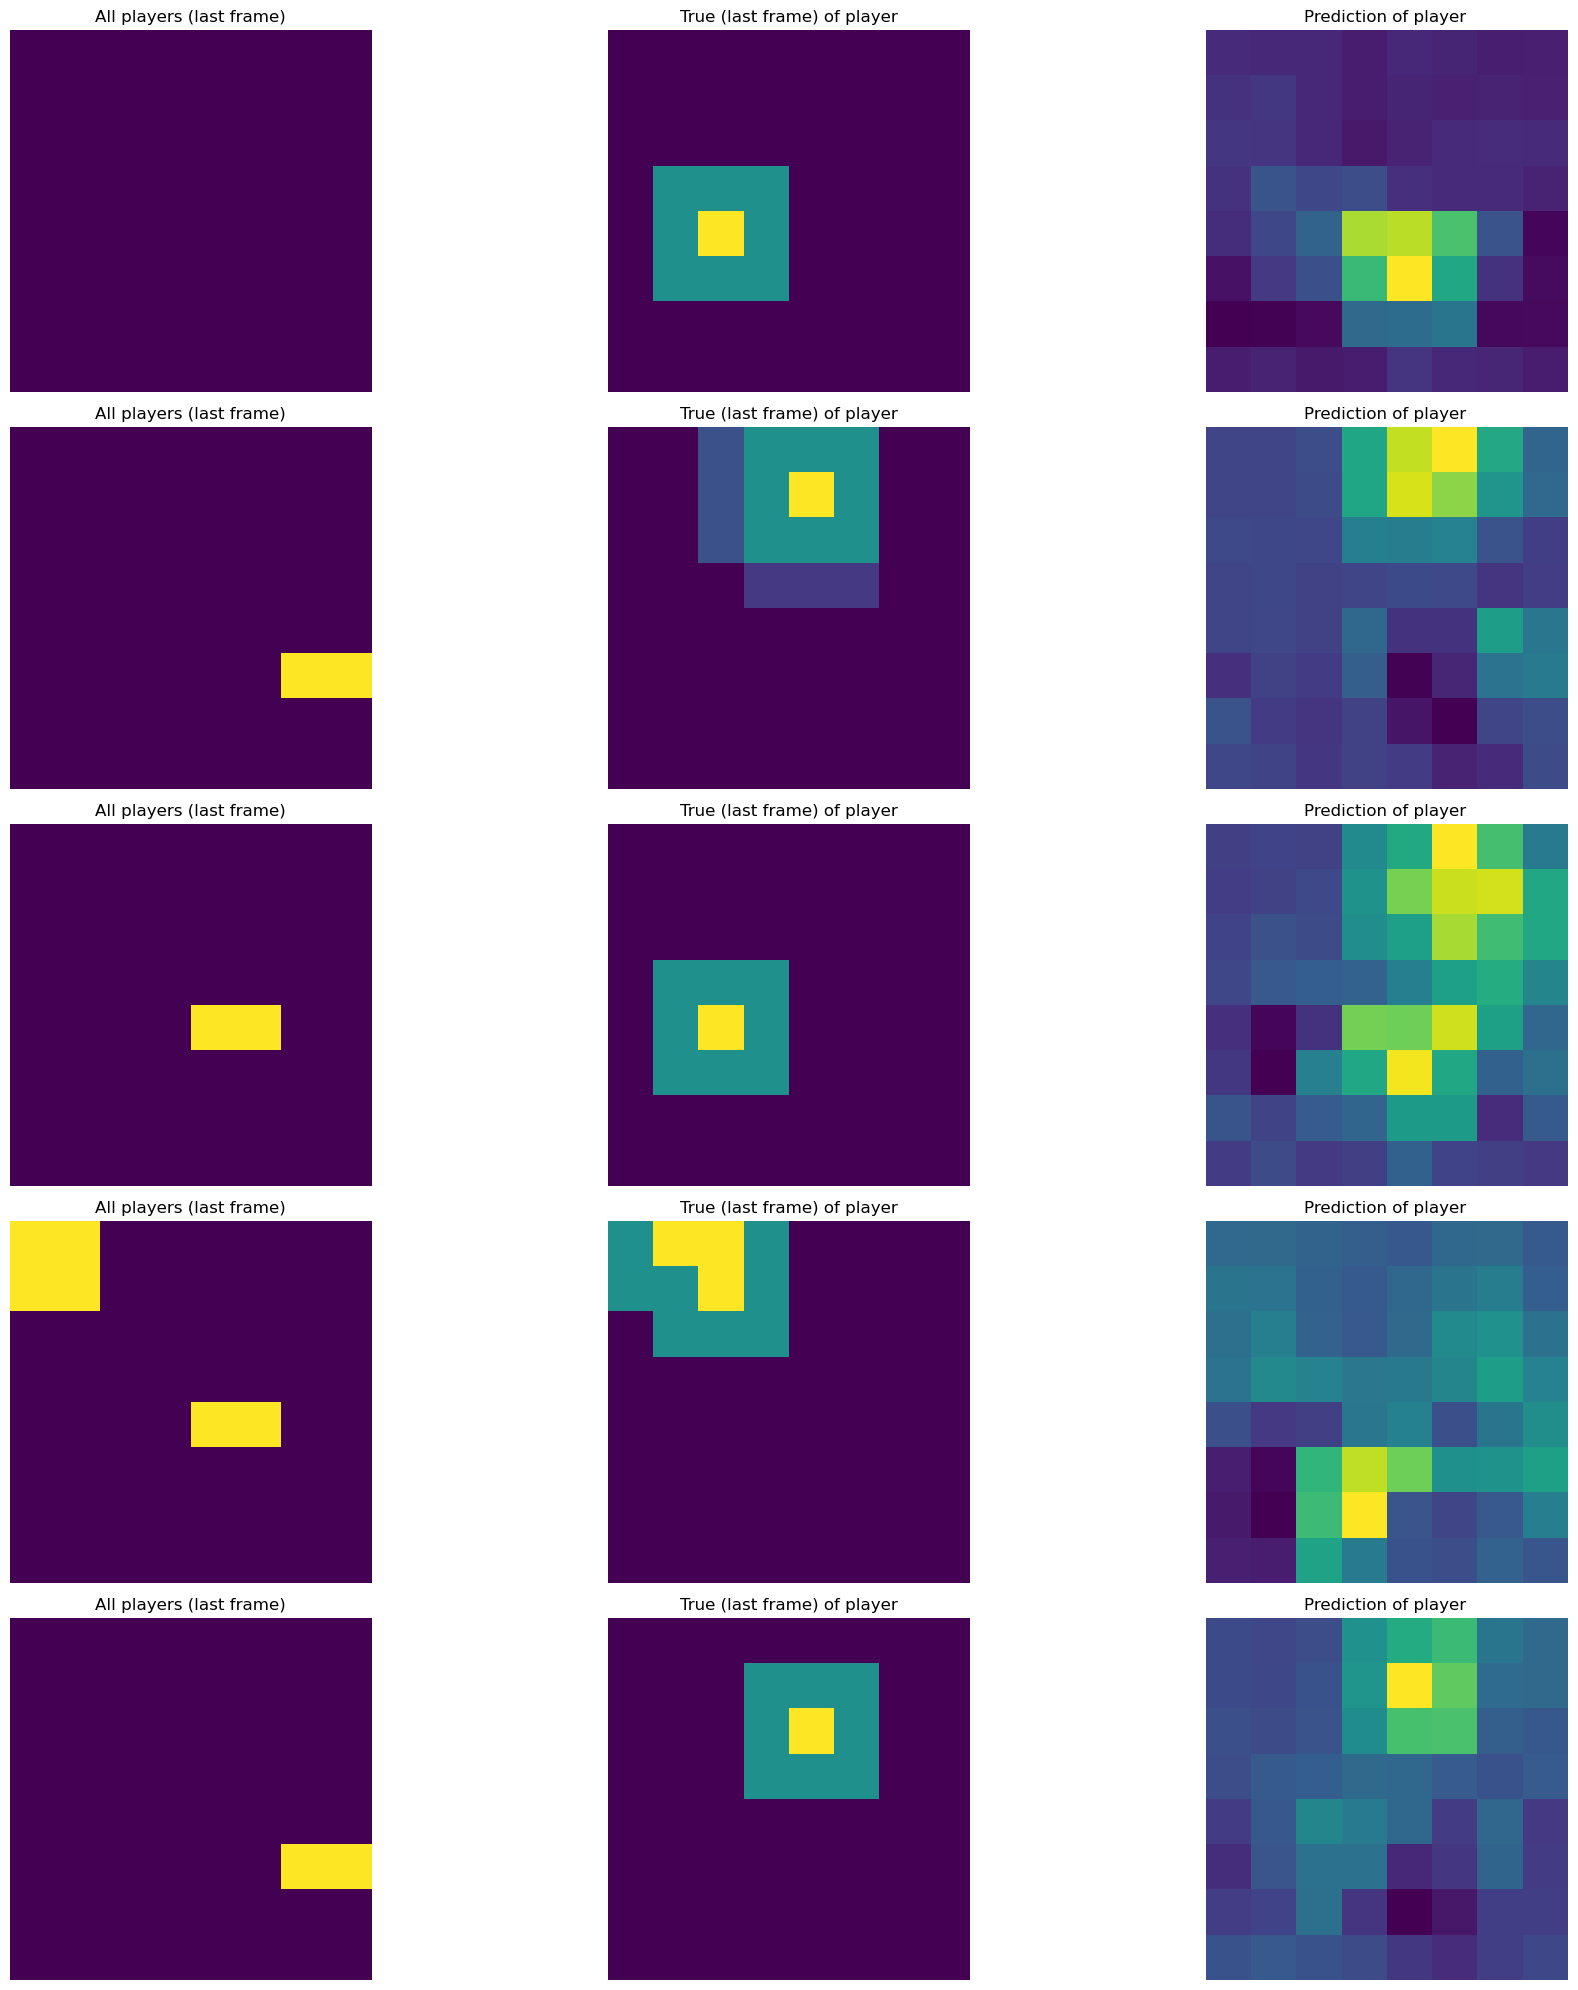

MODELO model1 - ESCENA Scene1
Epoch 1/50
36/36 [==============================] - 3s 39ms/step - loss: 0.0375 - mse: 0.0375 - mae: 0.1070 - val_loss: 0.0351 - val_mse: 0.0351 - val_mae: 0.1190
Epoch 2/50
36/36 [==============================] - 1s 20ms/step - loss: 0.0339 - mse: 0.0339 - mae: 0.1138 - val_loss: 0.0350 - val_mse: 0.0350 - val_mae: 0.1129
Epoch 3/50
36/36 [==============================] - 1s 21ms/step - loss: 0.0326 - mse: 0.0326 - mae: 0.1077 - val_loss: 0.0349 - val_mse: 0.0349 - val_mae: 0.1094
Epoch 4/50
36/36 [==============================] - 1s 18ms/step - loss: 0.0318 - mse: 0.0318 - mae: 0.1058 - val_loss: 0.0336 - val_mse: 0.0336 - val_mae: 0.1108
Epoch 5/50
36/36 [==============================] - 1s 22ms/step - loss: 0.0304 - mse: 0.0304 - mae: 0.1031 - val_loss: 0.0340 - val_mse: 0.0340 - val_mae: 0.1124
Epoch 6/50
36/36 [==============================] - 1s 22ms/step - loss: 0.0292 - mse: 0.0292 - mae: 0.1015 - val_loss: 0.0337 - val_mse: 0.0337 - val_mae:

8/8 [==============================] - 1s 8ms/step


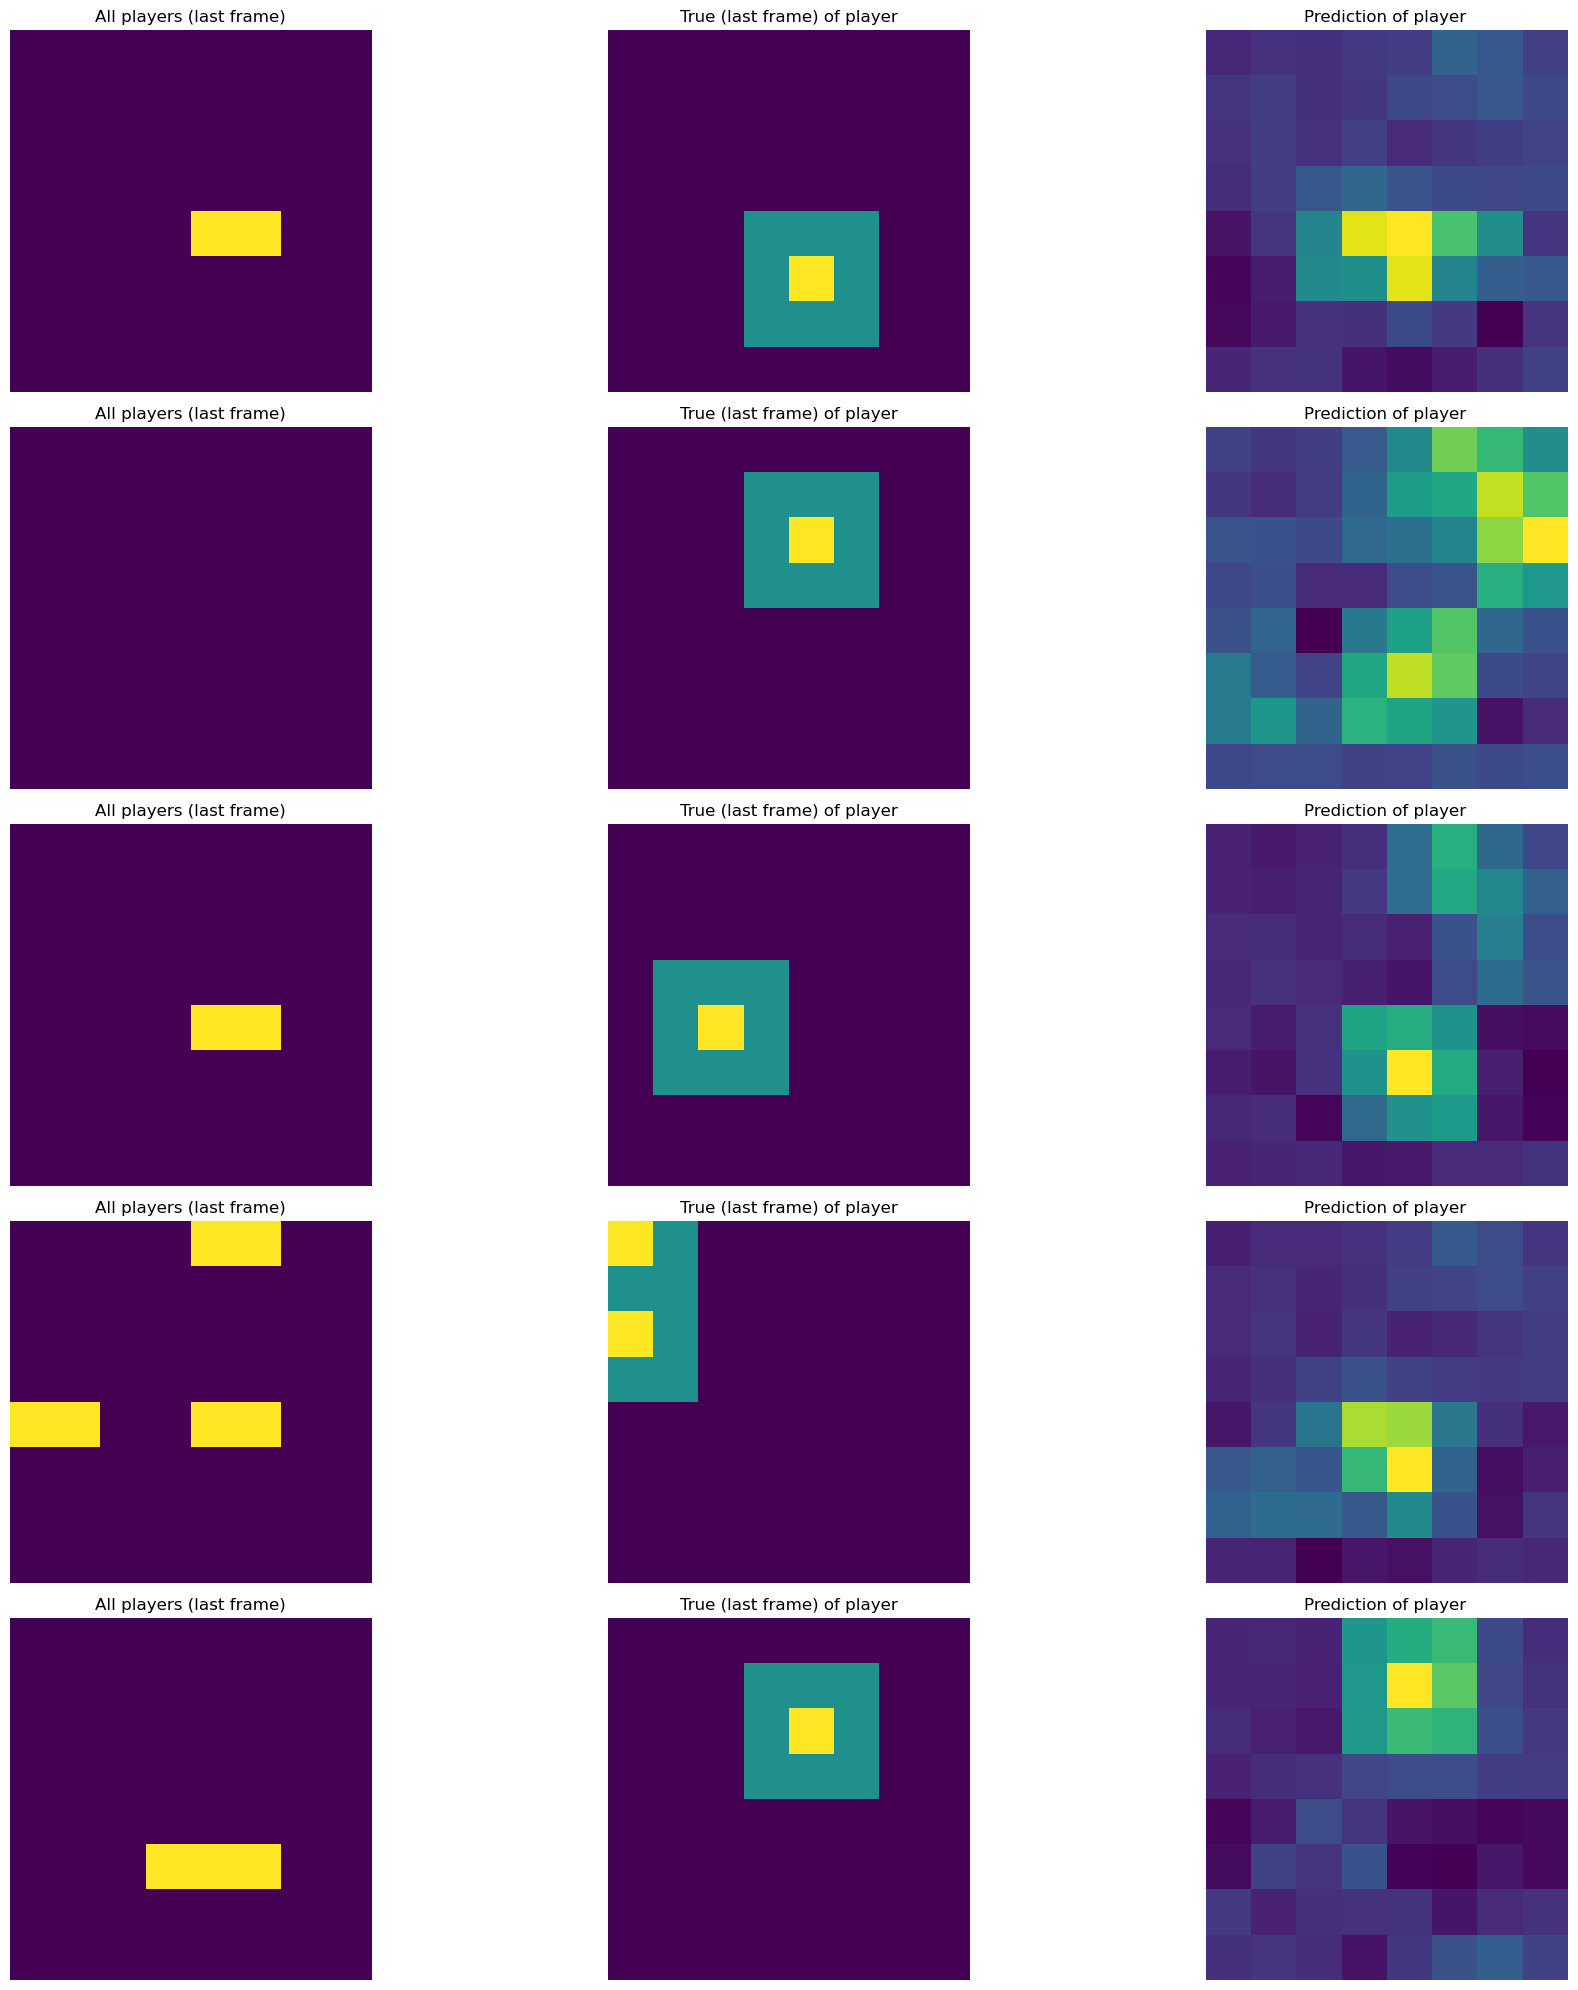

MODELO model2 - ESCENA Scene1
Epoch 1/50
36/36 [==============================] - 4s 72ms/step - loss: 0.0372 - mse: 0.0372 - mae: 0.1082 - val_loss: 0.0348 - val_mse: 0.0348 - val_mae: 0.1254
Epoch 2/50
36/36 [==============================] - 2s 45ms/step - loss: 0.0344 - mse: 0.0344 - mae: 0.1132 - val_loss: 0.0339 - val_mse: 0.0339 - val_mae: 0.1114
Epoch 3/50
36/36 [==============================] - 2s 49ms/step - loss: 0.0329 - mse: 0.0329 - mae: 0.1092 - val_loss: 0.0335 - val_mse: 0.0335 - val_mae: 0.1101
Epoch 4/50
36/36 [==============================] - 2s 54ms/step - loss: 0.0315 - mse: 0.0315 - mae: 0.1063 - val_loss: 0.0332 - val_mse: 0.0332 - val_mae: 0.1053
Epoch 5/50
36/36 [==============================] - 2s 51ms/step - loss: 0.0304 - mse: 0.0304 - mae: 0.1029 - val_loss: 0.0330 - val_mse: 0.0330 - val_mae: 0.1066
Epoch 6/50
36/36 [==============================] - 2s 52ms/step - loss: 0.0289 - mse: 0.0289 - mae: 0.1008 - val_loss: 0.0335 - val_mse: 0.0335 - val_mae:

8/8 [==============================] - 1s 12ms/step


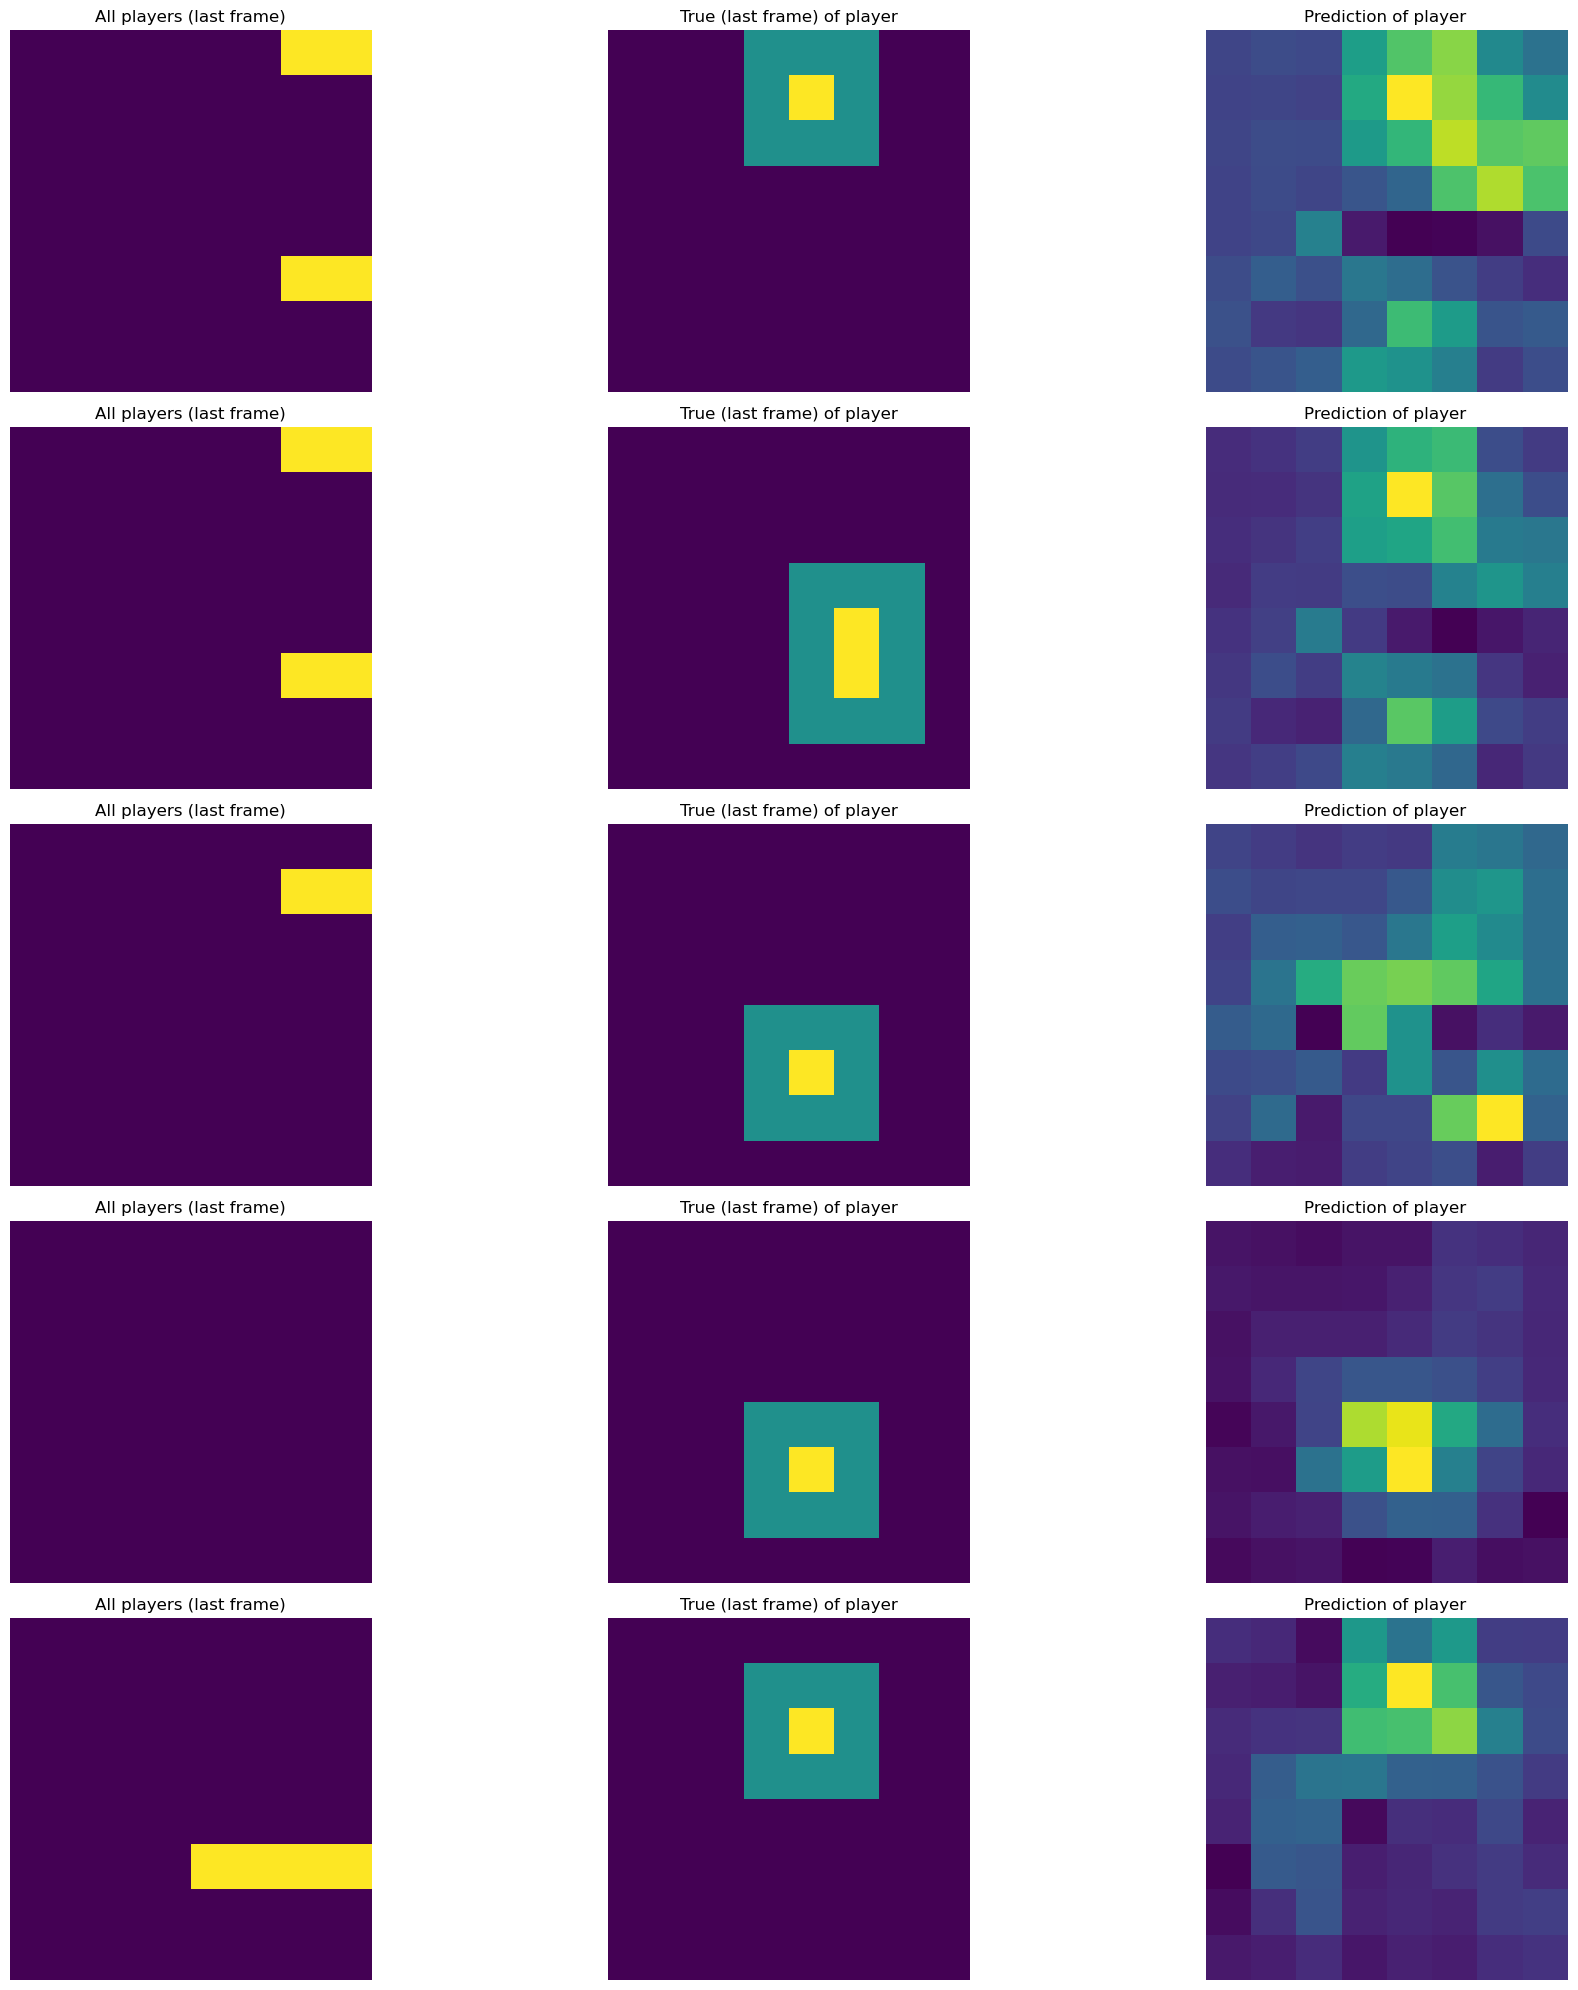

MODELO transf1 - ESCENA Scene1
Epoch 1/50
36/36 [==============================] - 15s 370ms/step - loss: 0.0429 - mse: 0.0429 - mae: 0.1298 - val_loss: 0.0371 - val_mse: 0.0371 - val_mae: 0.1107
Epoch 2/50
36/36 [==============================] - 11s 309ms/step - loss: 0.0357 - mse: 0.0357 - mae: 0.1159 - val_loss: 0.0364 - val_mse: 0.0364 - val_mae: 0.1162
Epoch 3/50
36/36 [==============================] - 12s 336ms/step - loss: 0.0339 - mse: 0.0339 - mae: 0.1134 - val_loss: 0.0340 - val_mse: 0.0340 - val_mae: 0.1134
Epoch 4/50
36/36 [==============================] - 12s 334ms/step - loss: 0.0326 - mse: 0.0326 - mae: 0.1098 - val_loss: 0.0362 - val_mse: 0.0362 - val_mae: 0.1146
Epoch 5/50
36/36 [==============================] - 12s 321ms/step - loss: 0.0311 - mse: 0.0311 - mae: 0.1079 - val_loss: 0.0340 - val_mse: 0.0340 - val_mae: 0.1122
Epoch 6/50
36/36 [==============================] - 12s 323ms/step - loss: 0.0301 - mse: 0.0301 - mae: 0.1054 - val_loss: 0.0360 - val_mse: 0.03

8/8 [==============================] - 2s 229ms/step


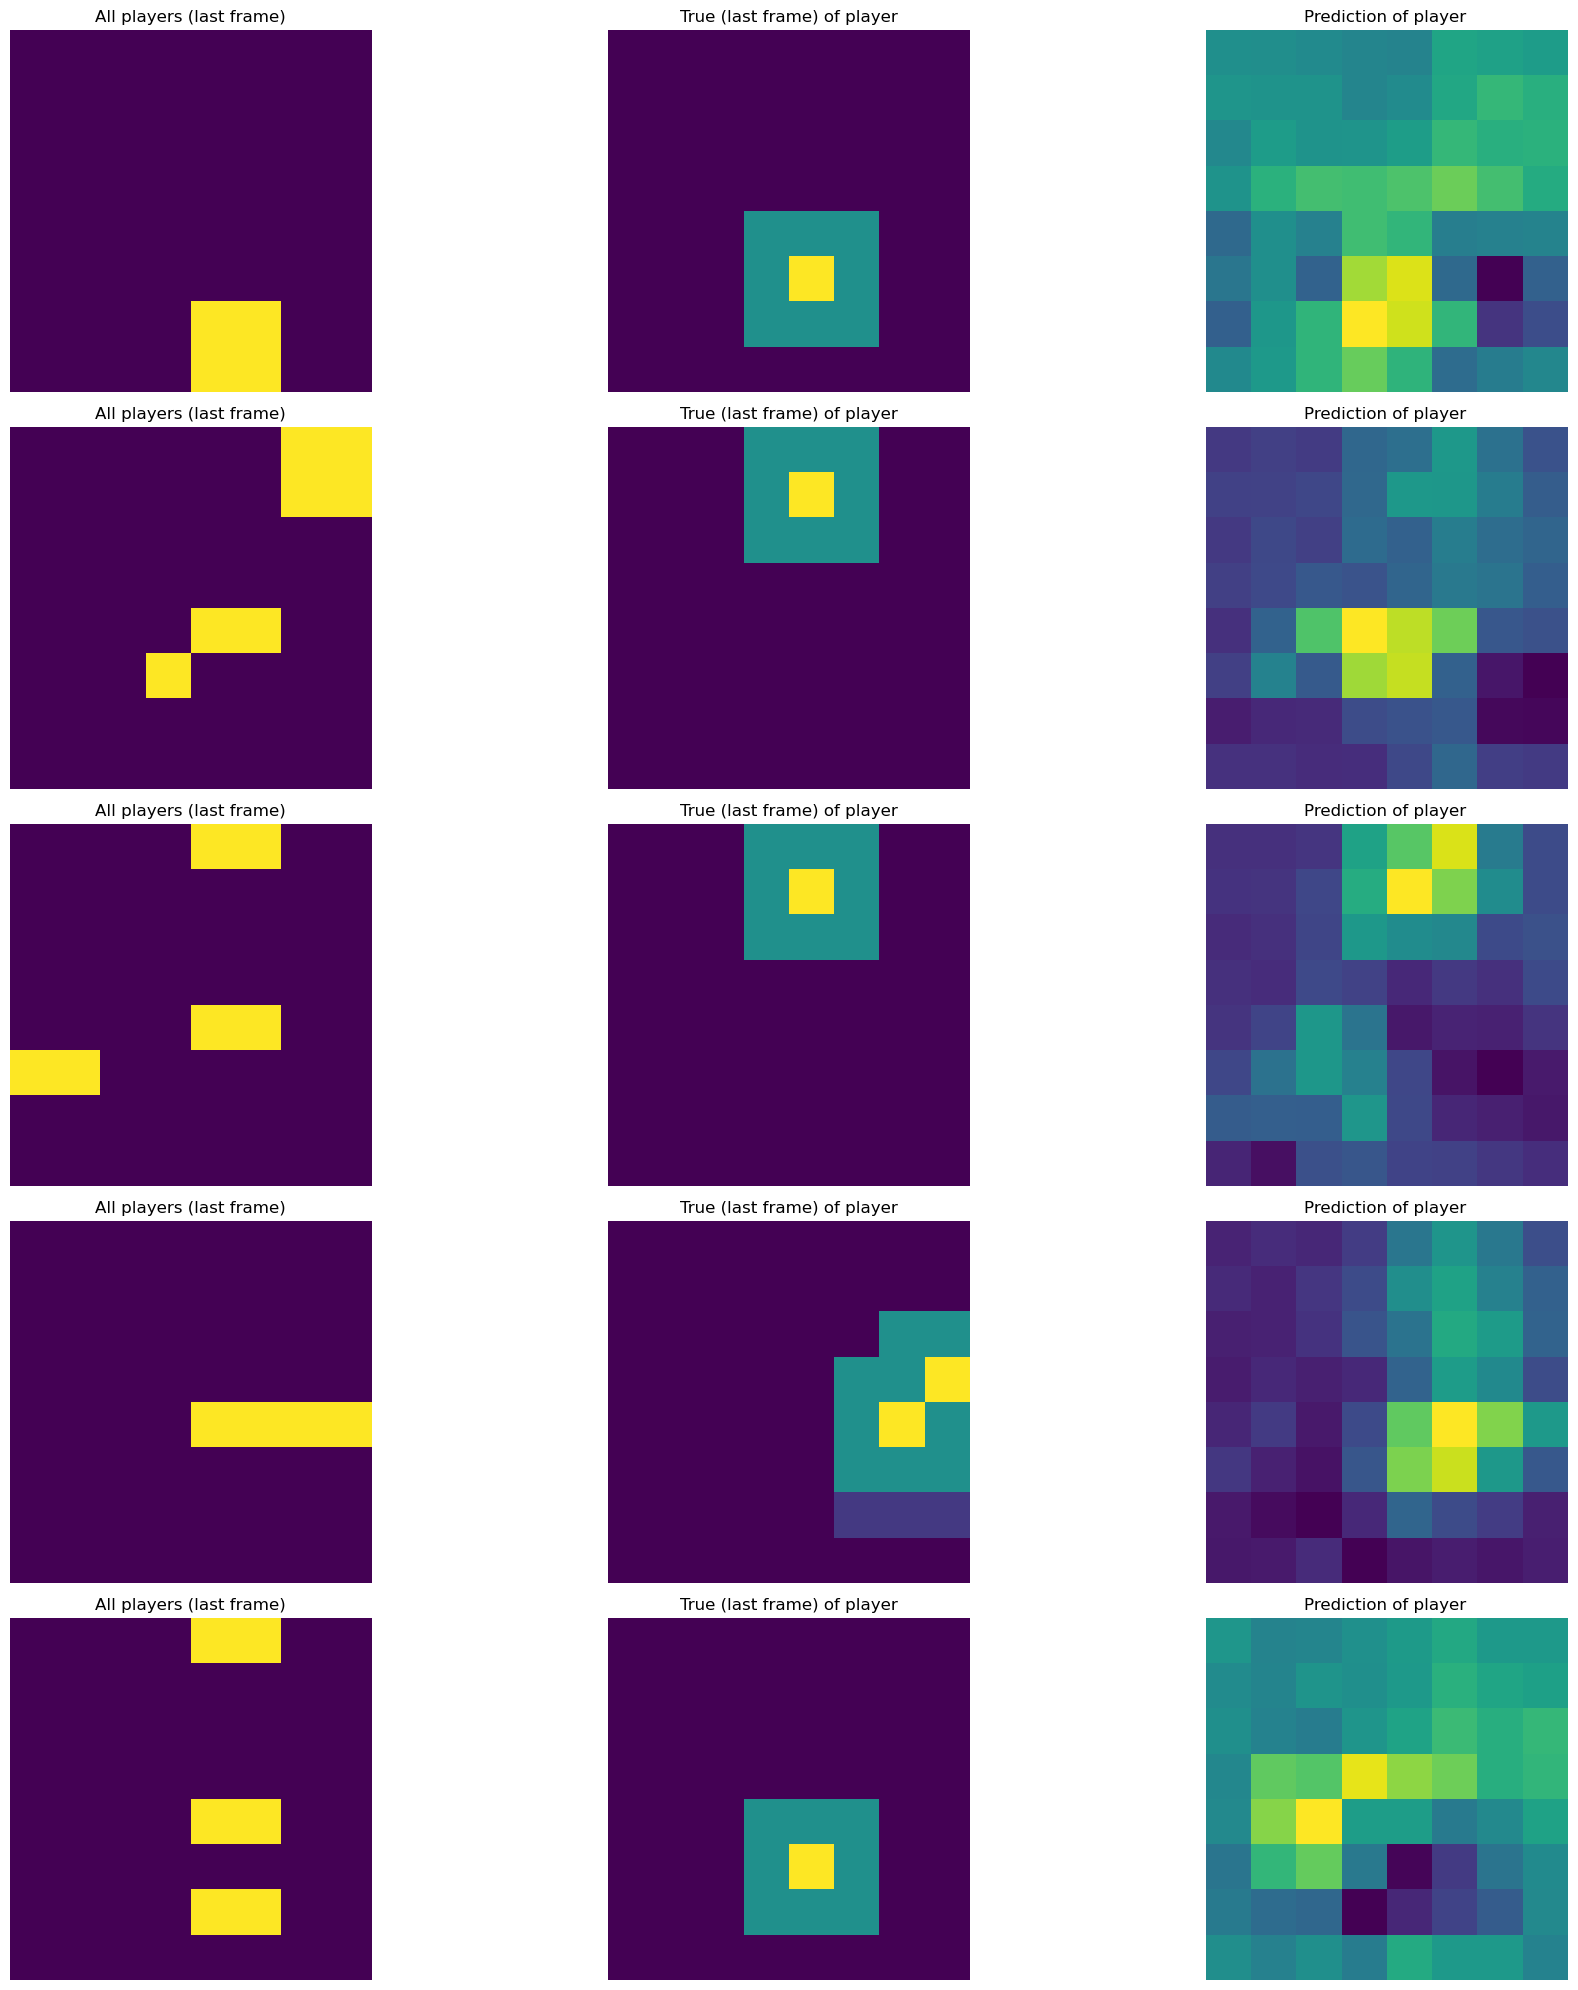

MODELO model0 - ESCENA Scene2
Epoch 1/50
30/30 [==============================] - 13s 205ms/step - loss: 0.0400 - mse: 0.0400 - mae: 0.1074 - val_loss: 0.0353 - val_mse: 0.0353 - val_mae: 0.1242
Epoch 2/50
30/30 [==============================] - 5s 169ms/step - loss: 0.0370 - mse: 0.0370 - mae: 0.1249 - val_loss: 0.0342 - val_mse: 0.0342 - val_mae: 0.1199
Epoch 3/50
30/30 [==============================] - 5s 164ms/step - loss: 0.0363 - mse: 0.0363 - mae: 0.1189 - val_loss: 0.0354 - val_mse: 0.0354 - val_mae: 0.1180
Epoch 4/50
30/30 [==============================] - 5s 163ms/step - loss: 0.0357 - mse: 0.0357 - mae: 0.1168 - val_loss: 0.0351 - val_mse: 0.0351 - val_mae: 0.1189
Epoch 5/50
30/30 [==============================] - 5s 164ms/step - loss: 0.0352 - mse: 0.0352 - mae: 0.1172 - val_loss: 0.0353 - val_mse: 0.0353 - val_mae: 0.1136
Epoch 6/50
30/30 [==============================] - 5s 163ms/step - loss: 0.0346 - mse: 0.0346 - mae: 0.1141 - val_loss: 0.0354 - val_mse: 0.0354 - v

11/11 [==============================] - 1s 66ms/step


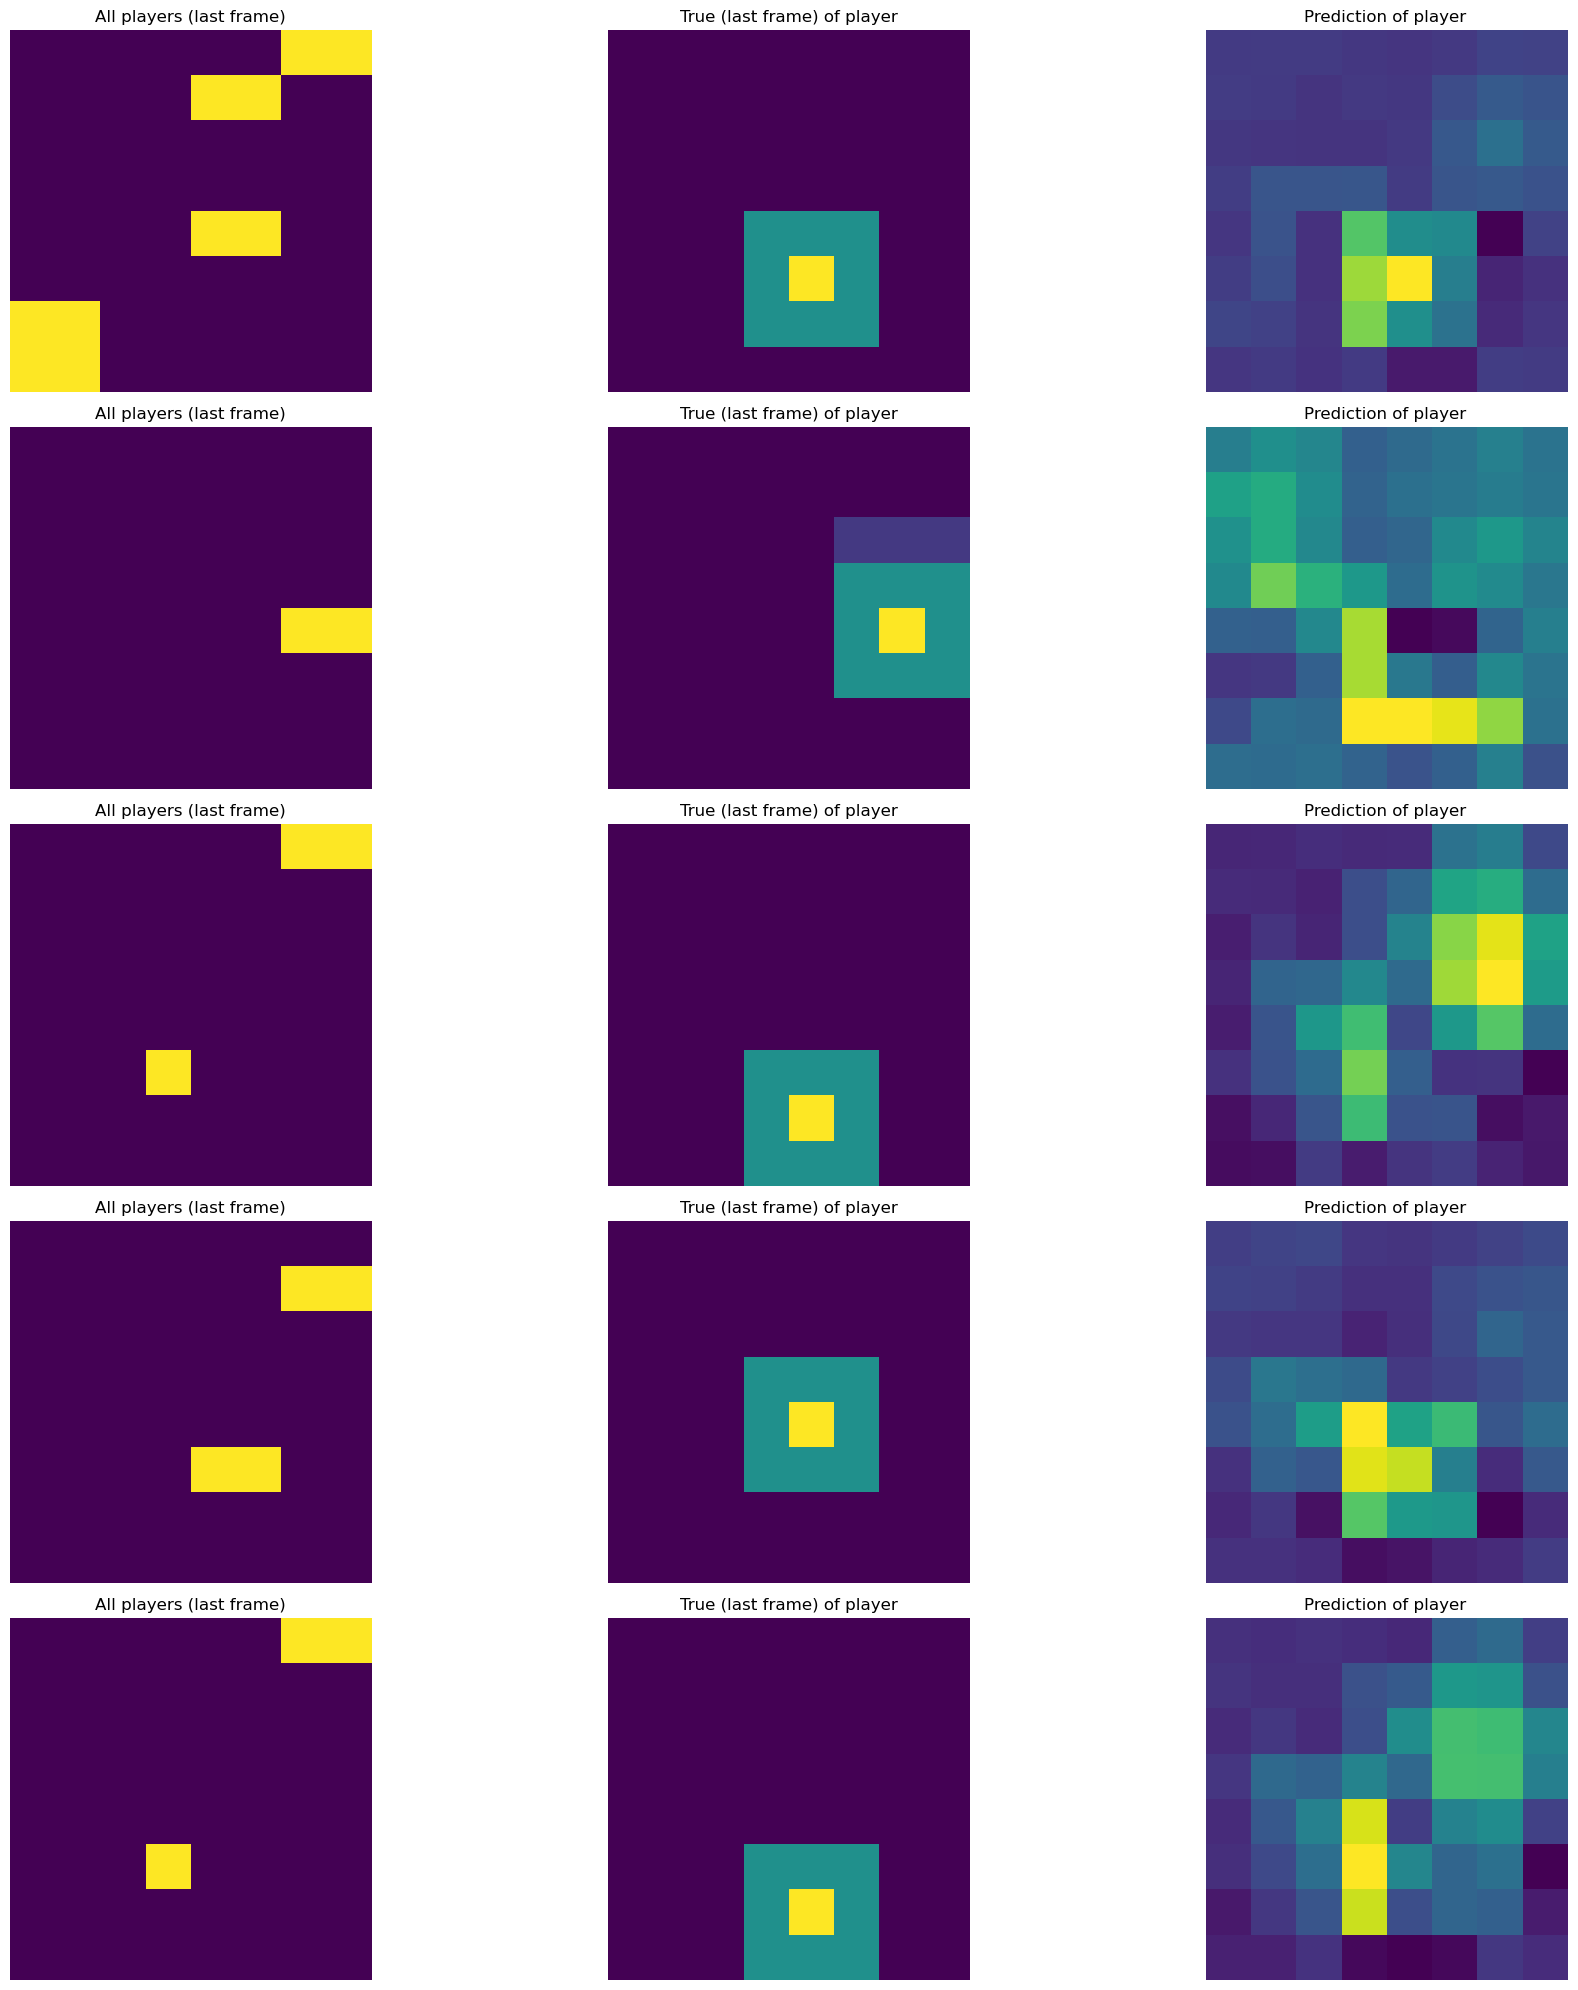

MODELO model1 - ESCENA Scene2
Epoch 1/50
30/30 [==============================] - 5s 116ms/step - loss: 0.0387 - mse: 0.0387 - mae: 0.1055 - val_loss: 0.0344 - val_mse: 0.0344 - val_mae: 0.1173
Epoch 2/50
30/30 [==============================] - 3s 95ms/step - loss: 0.0349 - mse: 0.0349 - mae: 0.1147 - val_loss: 0.0348 - val_mse: 0.0348 - val_mae: 0.1164
Epoch 3/50
30/30 [==============================] - 3s 93ms/step - loss: 0.0336 - mse: 0.0336 - mae: 0.1124 - val_loss: 0.0342 - val_mse: 0.0342 - val_mae: 0.1099
Epoch 4/50
30/30 [==============================] - 3s 94ms/step - loss: 0.0324 - mse: 0.0324 - mae: 0.1077 - val_loss: 0.0343 - val_mse: 0.0343 - val_mae: 0.1058
Epoch 5/50
30/30 [==============================] - 3s 95ms/step - loss: 0.0316 - mse: 0.0316 - mae: 0.1063 - val_loss: 0.0334 - val_mse: 0.0334 - val_mae: 0.1058
Epoch 6/50
30/30 [==============================] - 3s 94ms/step - loss: 0.0302 - mse: 0.0302 - mae: 0.1028 - val_loss: 0.0327 - val_mse: 0.0327 - val_mae

11/11 [==============================] - 1s 21ms/step


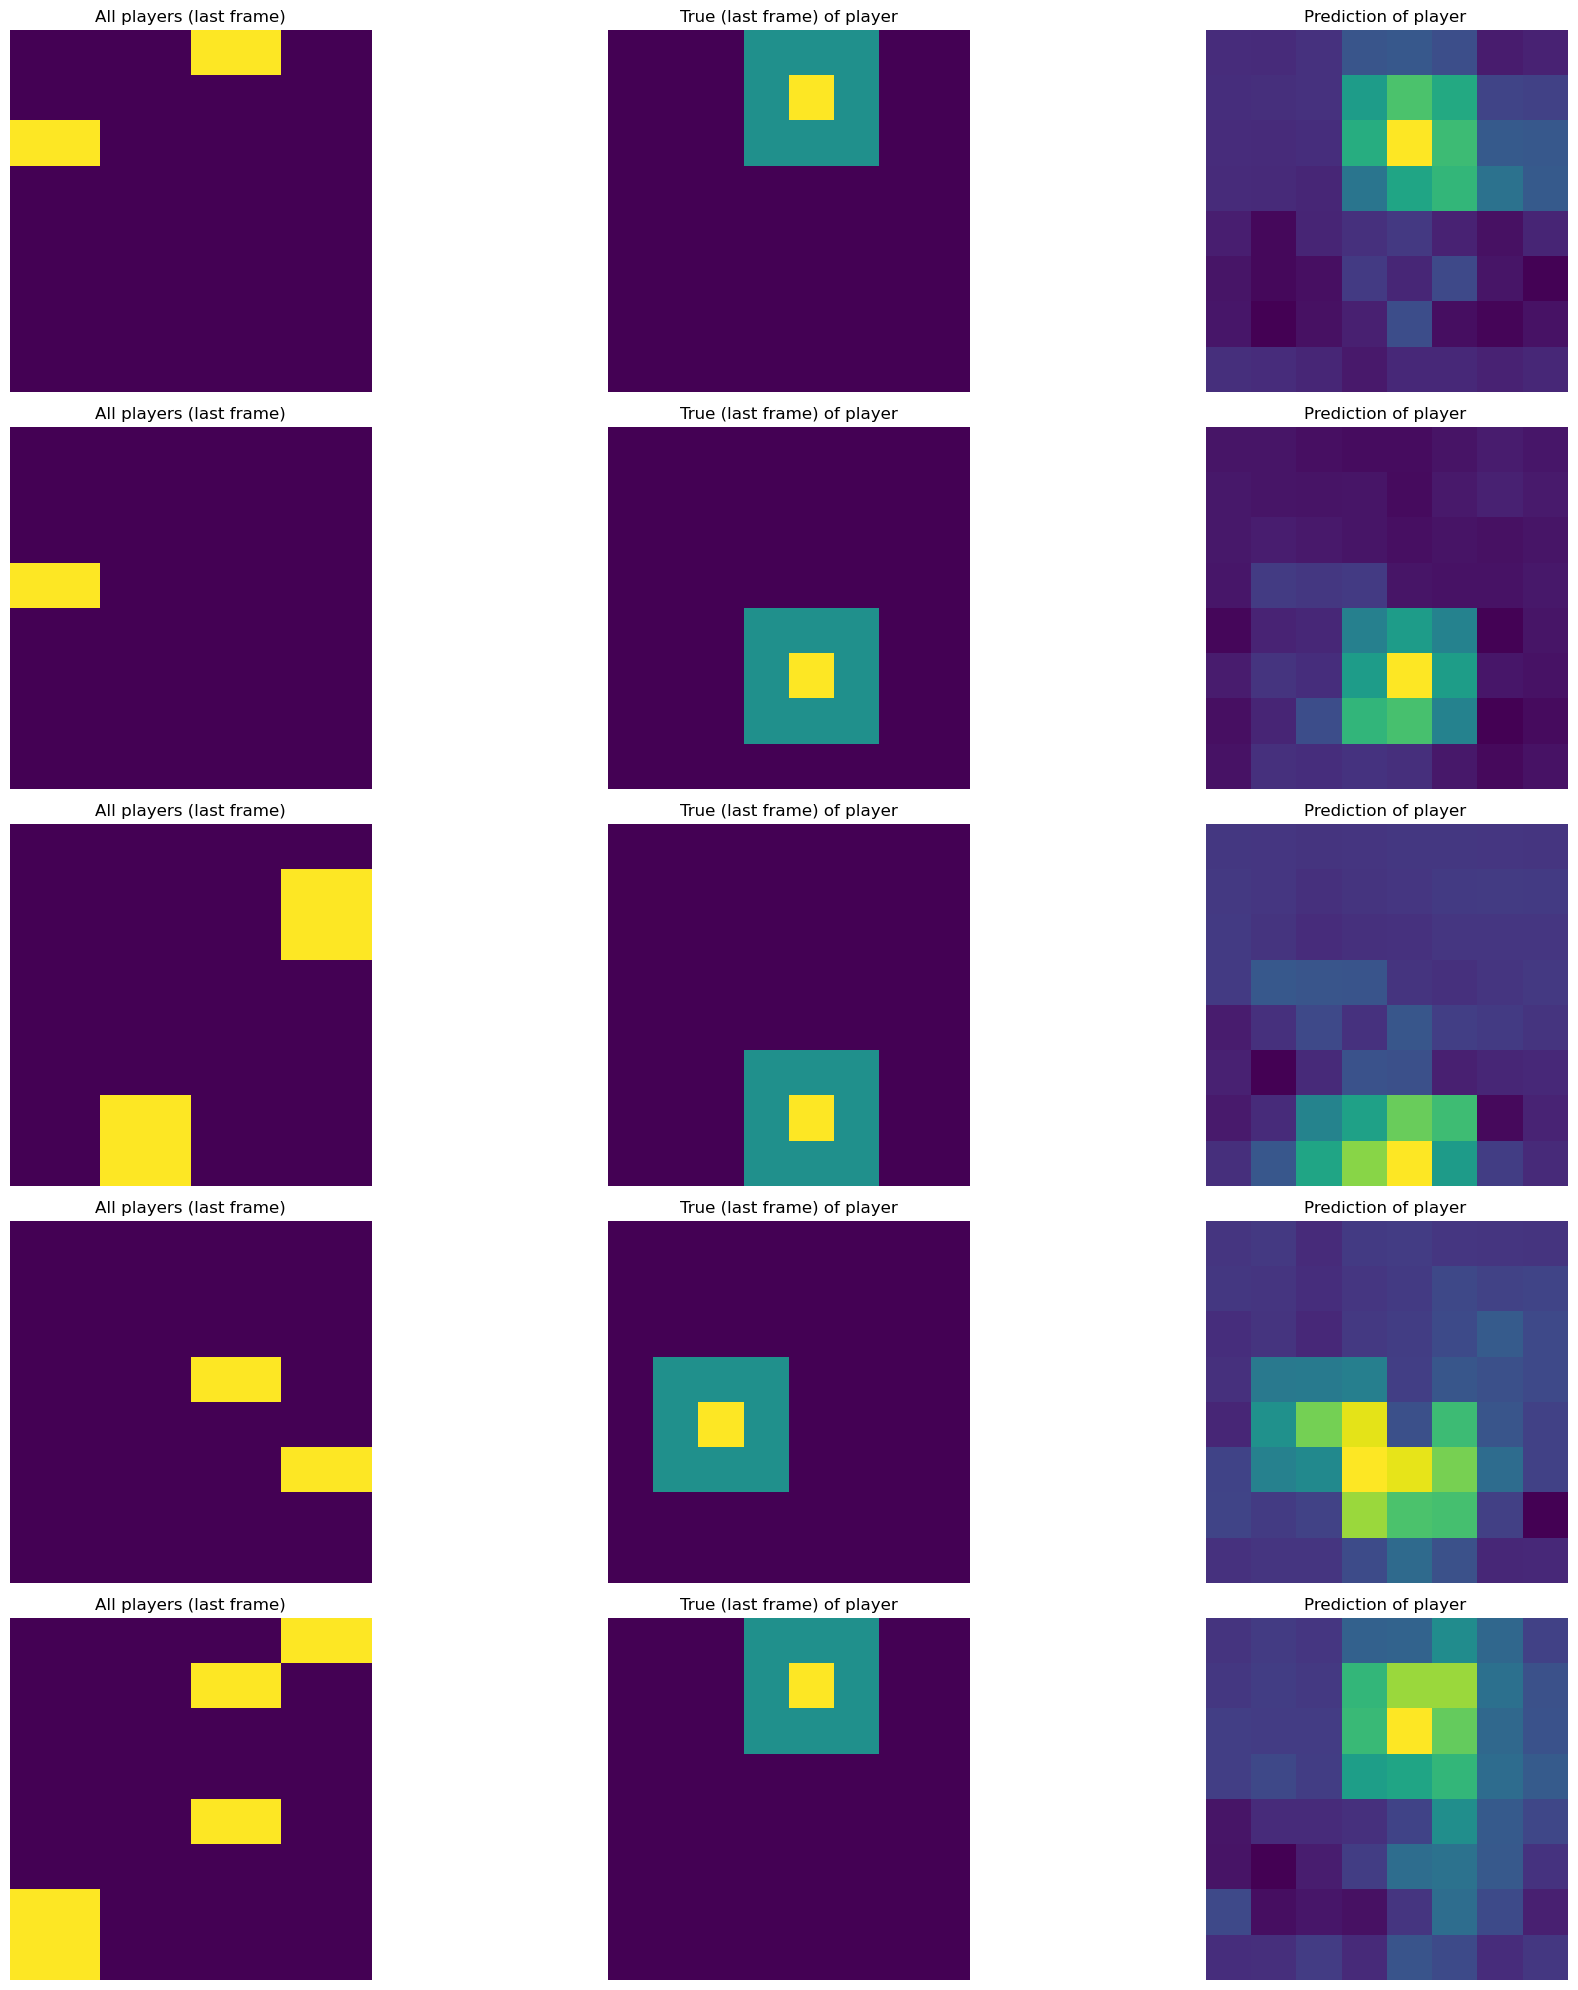

MODELO model2 - ESCENA Scene2
Epoch 1/50
30/30 [==============================] - 7s 174ms/step - loss: 0.0386 - mse: 0.0386 - mae: 0.1071 - val_loss: 0.0343 - val_mse: 0.0343 - val_mae: 0.1282
Epoch 2/50
30/30 [==============================] - 4s 136ms/step - loss: 0.0352 - mse: 0.0352 - mae: 0.1164 - val_loss: 0.0335 - val_mse: 0.0335 - val_mae: 0.1116
Epoch 3/50
30/30 [==============================] - 4s 135ms/step - loss: 0.0336 - mse: 0.0336 - mae: 0.1117 - val_loss: 0.0342 - val_mse: 0.0342 - val_mae: 0.1066
Epoch 4/50
30/30 [==============================] - 4s 136ms/step - loss: 0.0327 - mse: 0.0327 - mae: 0.1071 - val_loss: 0.0347 - val_mse: 0.0347 - val_mae: 0.1070
Epoch 5/50
30/30 [==============================] - 4s 135ms/step - loss: 0.0316 - mse: 0.0316 - mae: 0.1064 - val_loss: 0.0339 - val_mse: 0.0339 - val_mae: 0.1077
Epoch 6/50
30/30 [==============================] - 4s 135ms/step - loss: 0.0304 - mse: 0.0304 - mae: 0.1041 - val_loss: 0.0328 - val_mse: 0.0328 - va

11/11 [==============================] - 1s 64ms/step


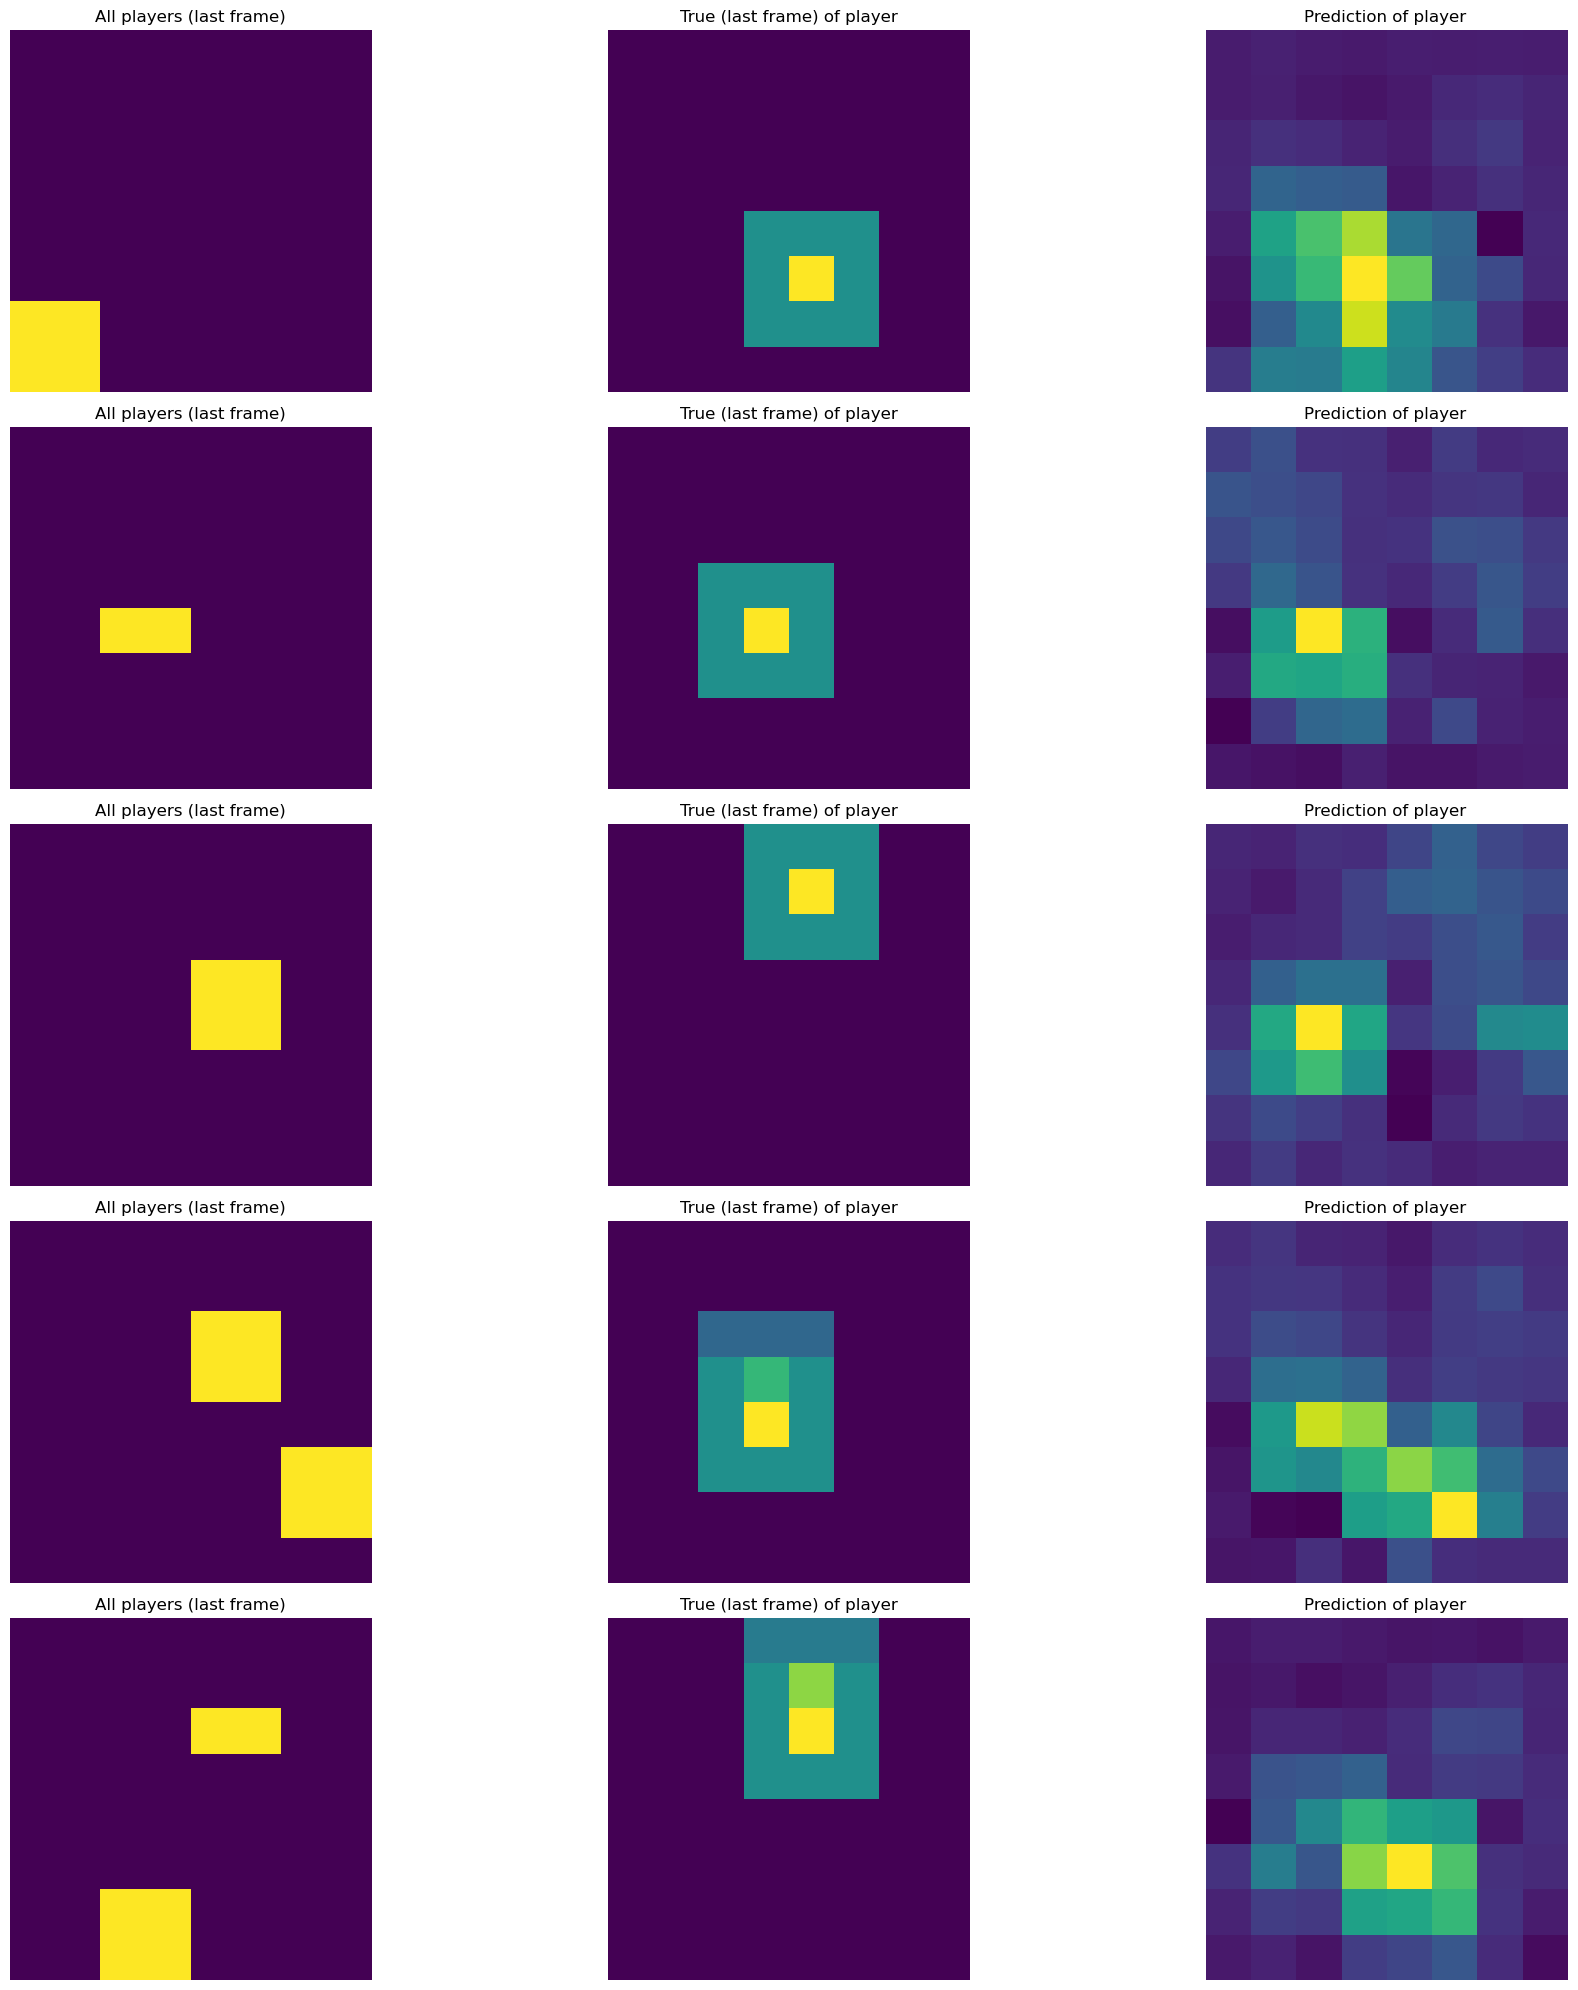

MODELO transf1 - ESCENA Scene2
Epoch 1/50
30/30 [==============================] - 48s 2s/step - loss: 0.0436 - mse: 0.0436 - mae: 0.1316 - val_loss: 0.0355 - val_mse: 0.0355 - val_mae: 0.1171
Epoch 2/50
30/30 [==============================] - 46s 2s/step - loss: 0.0364 - mse: 0.0364 - mae: 0.1182 - val_loss: 0.0352 - val_mse: 0.0352 - val_mae: 0.1187
Epoch 3/50
30/30 [==============================] - 46s 2s/step - loss: 0.0348 - mse: 0.0348 - mae: 0.1144 - val_loss: 0.0339 - val_mse: 0.0339 - val_mae: 0.1164
Epoch 4/50
30/30 [==============================] - 46s 2s/step - loss: 0.0331 - mse: 0.0331 - mae: 0.1129 - val_loss: 0.0334 - val_mse: 0.0334 - val_mae: 0.1057
Epoch 5/50
30/30 [==============================] - 46s 2s/step - loss: 0.0320 - mse: 0.0320 - mae: 0.1086 - val_loss: 0.0337 - val_mse: 0.0337 - val_mae: 0.1060
Epoch 6/50
30/30 [==============================] - 47s 2s/step - loss: 0.0309 - mse: 0.0309 - mae: 0.1067 - val_loss: 0.0333 - val_mse: 0.0333 - val_mae: 0.10

11/11 [==============================] - 10s 906ms/step


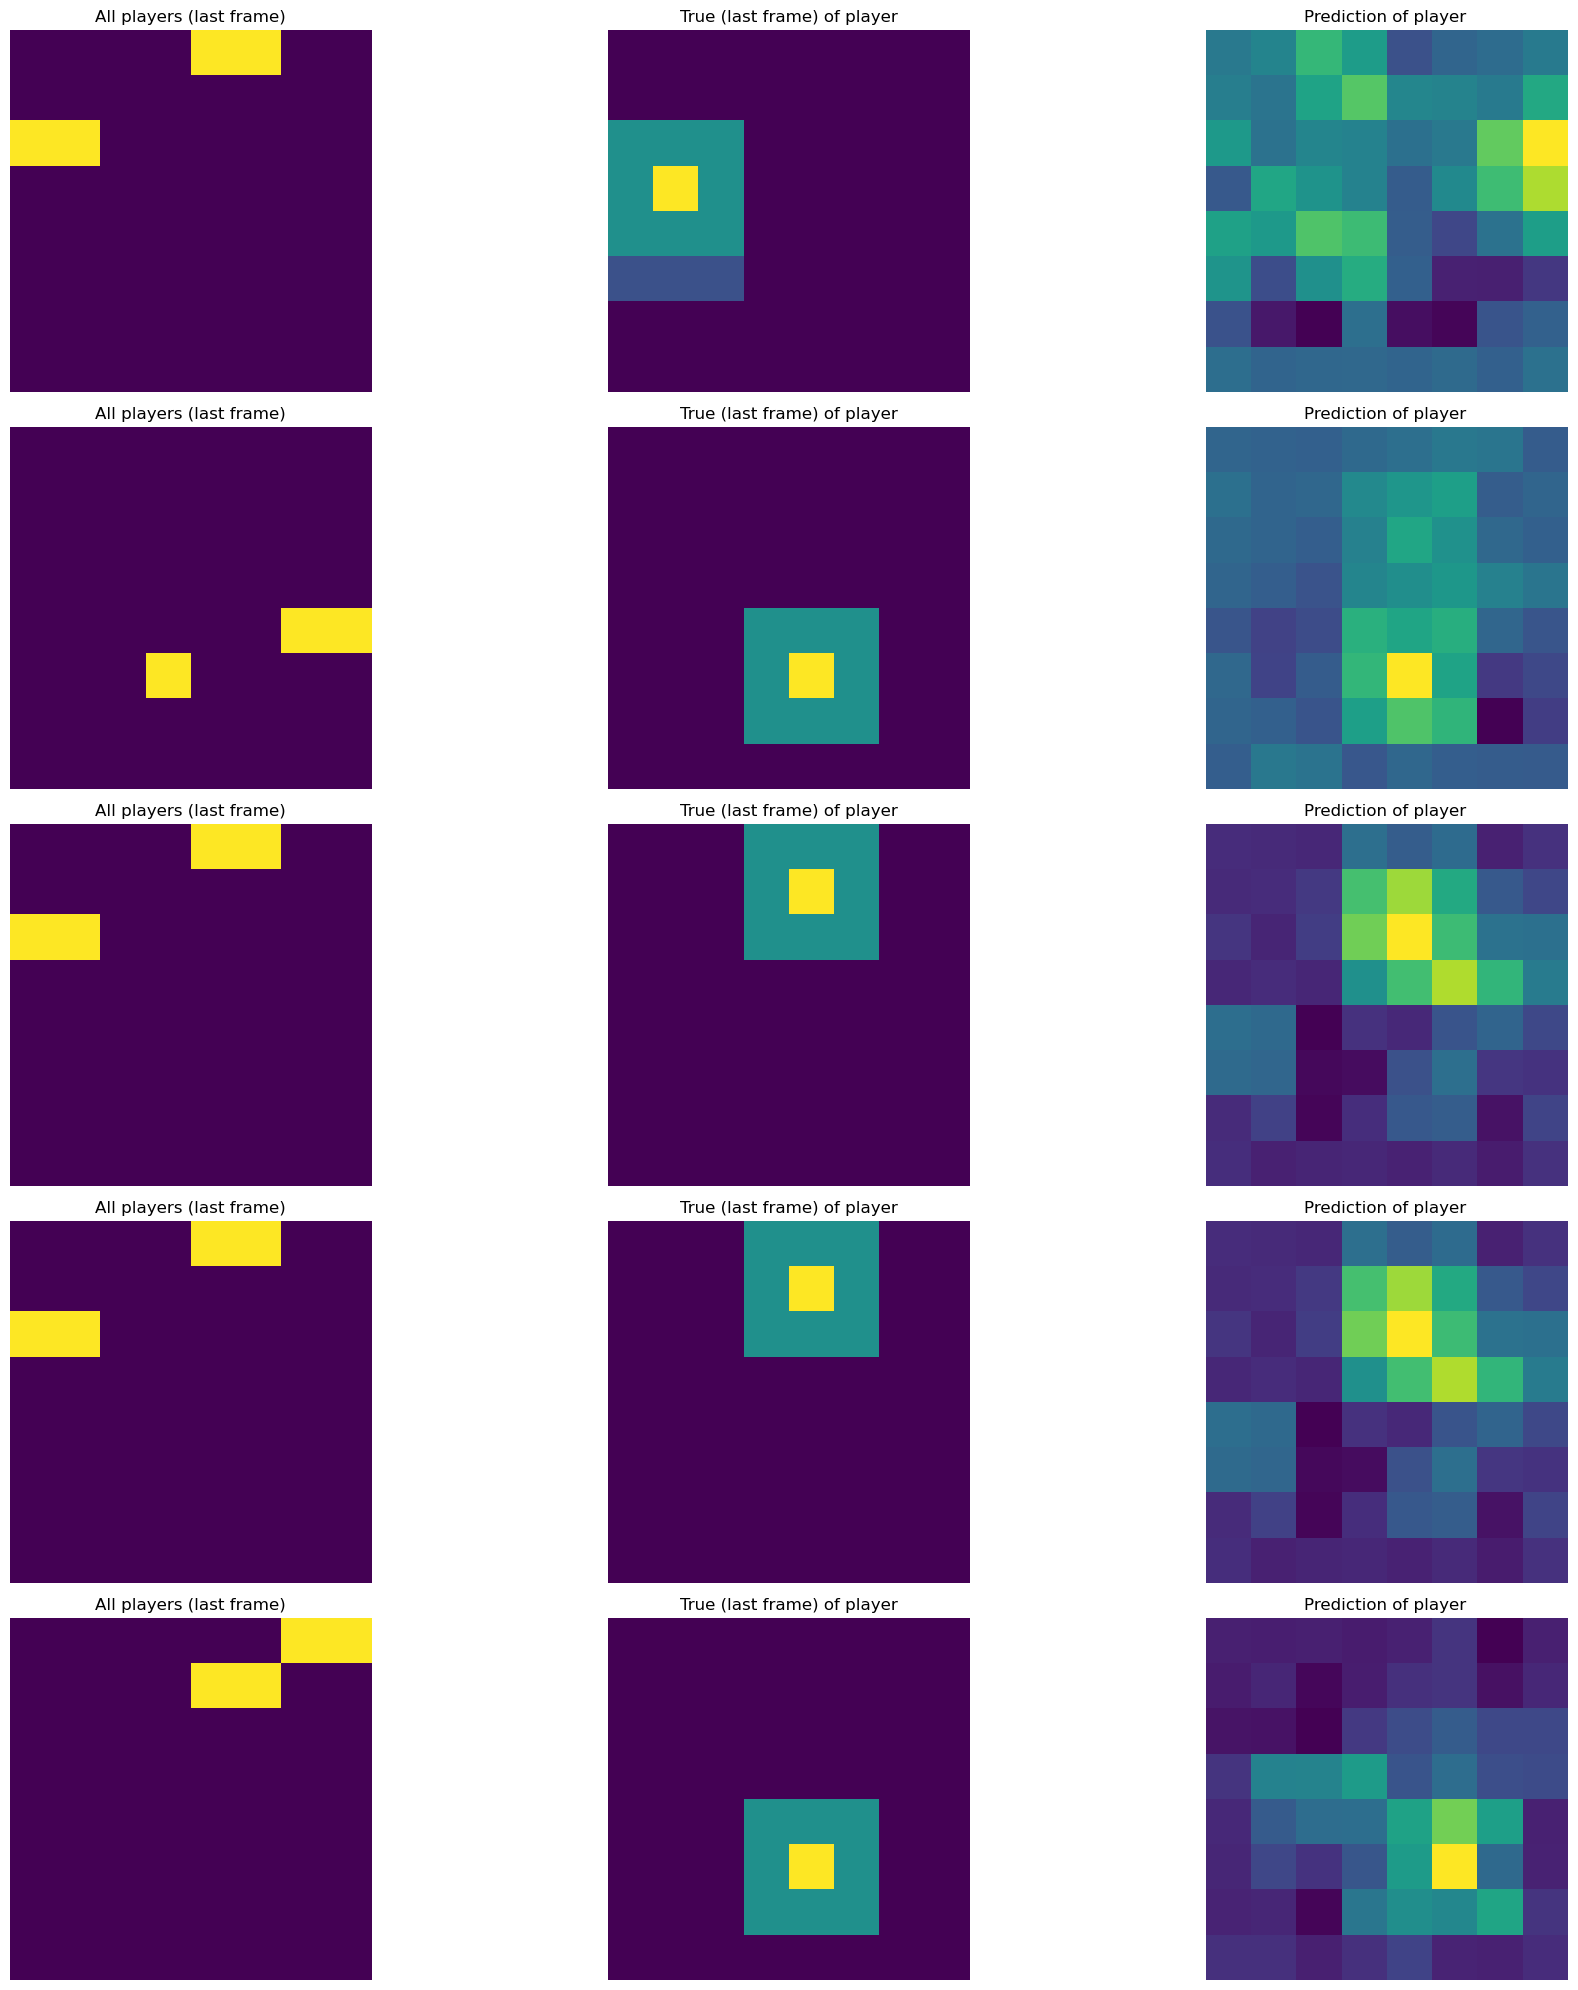

MODELO model0 - ESCENA Scene3
Epoch 1/50
38/38 [==============================] - 14s 196ms/step - loss: 0.0376 - mse: 0.0376 - mae: 0.1079 - val_loss: 0.0409 - val_mse: 0.0409 - val_mae: 0.1245
Epoch 2/50
38/38 [==============================] - 7s 174ms/step - loss: 0.0336 - mse: 0.0336 - mae: 0.1137 - val_loss: 0.0439 - val_mse: 0.0439 - val_mae: 0.1288
Epoch 3/50
38/38 [==============================] - 7s 174ms/step - loss: 0.0330 - mse: 0.0330 - mae: 0.1097 - val_loss: 0.0421 - val_mse: 0.0421 - val_mae: 0.1204
Epoch 4/50
38/38 [==============================] - 7s 173ms/step - loss: 0.0329 - mse: 0.0329 - mae: 0.1090 - val_loss: 0.0419 - val_mse: 0.0419 - val_mae: 0.1199
Epoch 5/50
38/38 [==============================] - 7s 172ms/step - loss: 0.0324 - mse: 0.0324 - mae: 0.1074 - val_loss: 0.0424 - val_mse: 0.0424 - val_mae: 0.1214
Epoch 6/50
38/38 [==============================] - 7s 172ms/step - loss: 0.0323 - mse: 0.0323 - mae: 0.1063 - val_loss: 0.0424 - val_mse: 0.0424 - v

8/8 [==============================] - 1s 69ms/step


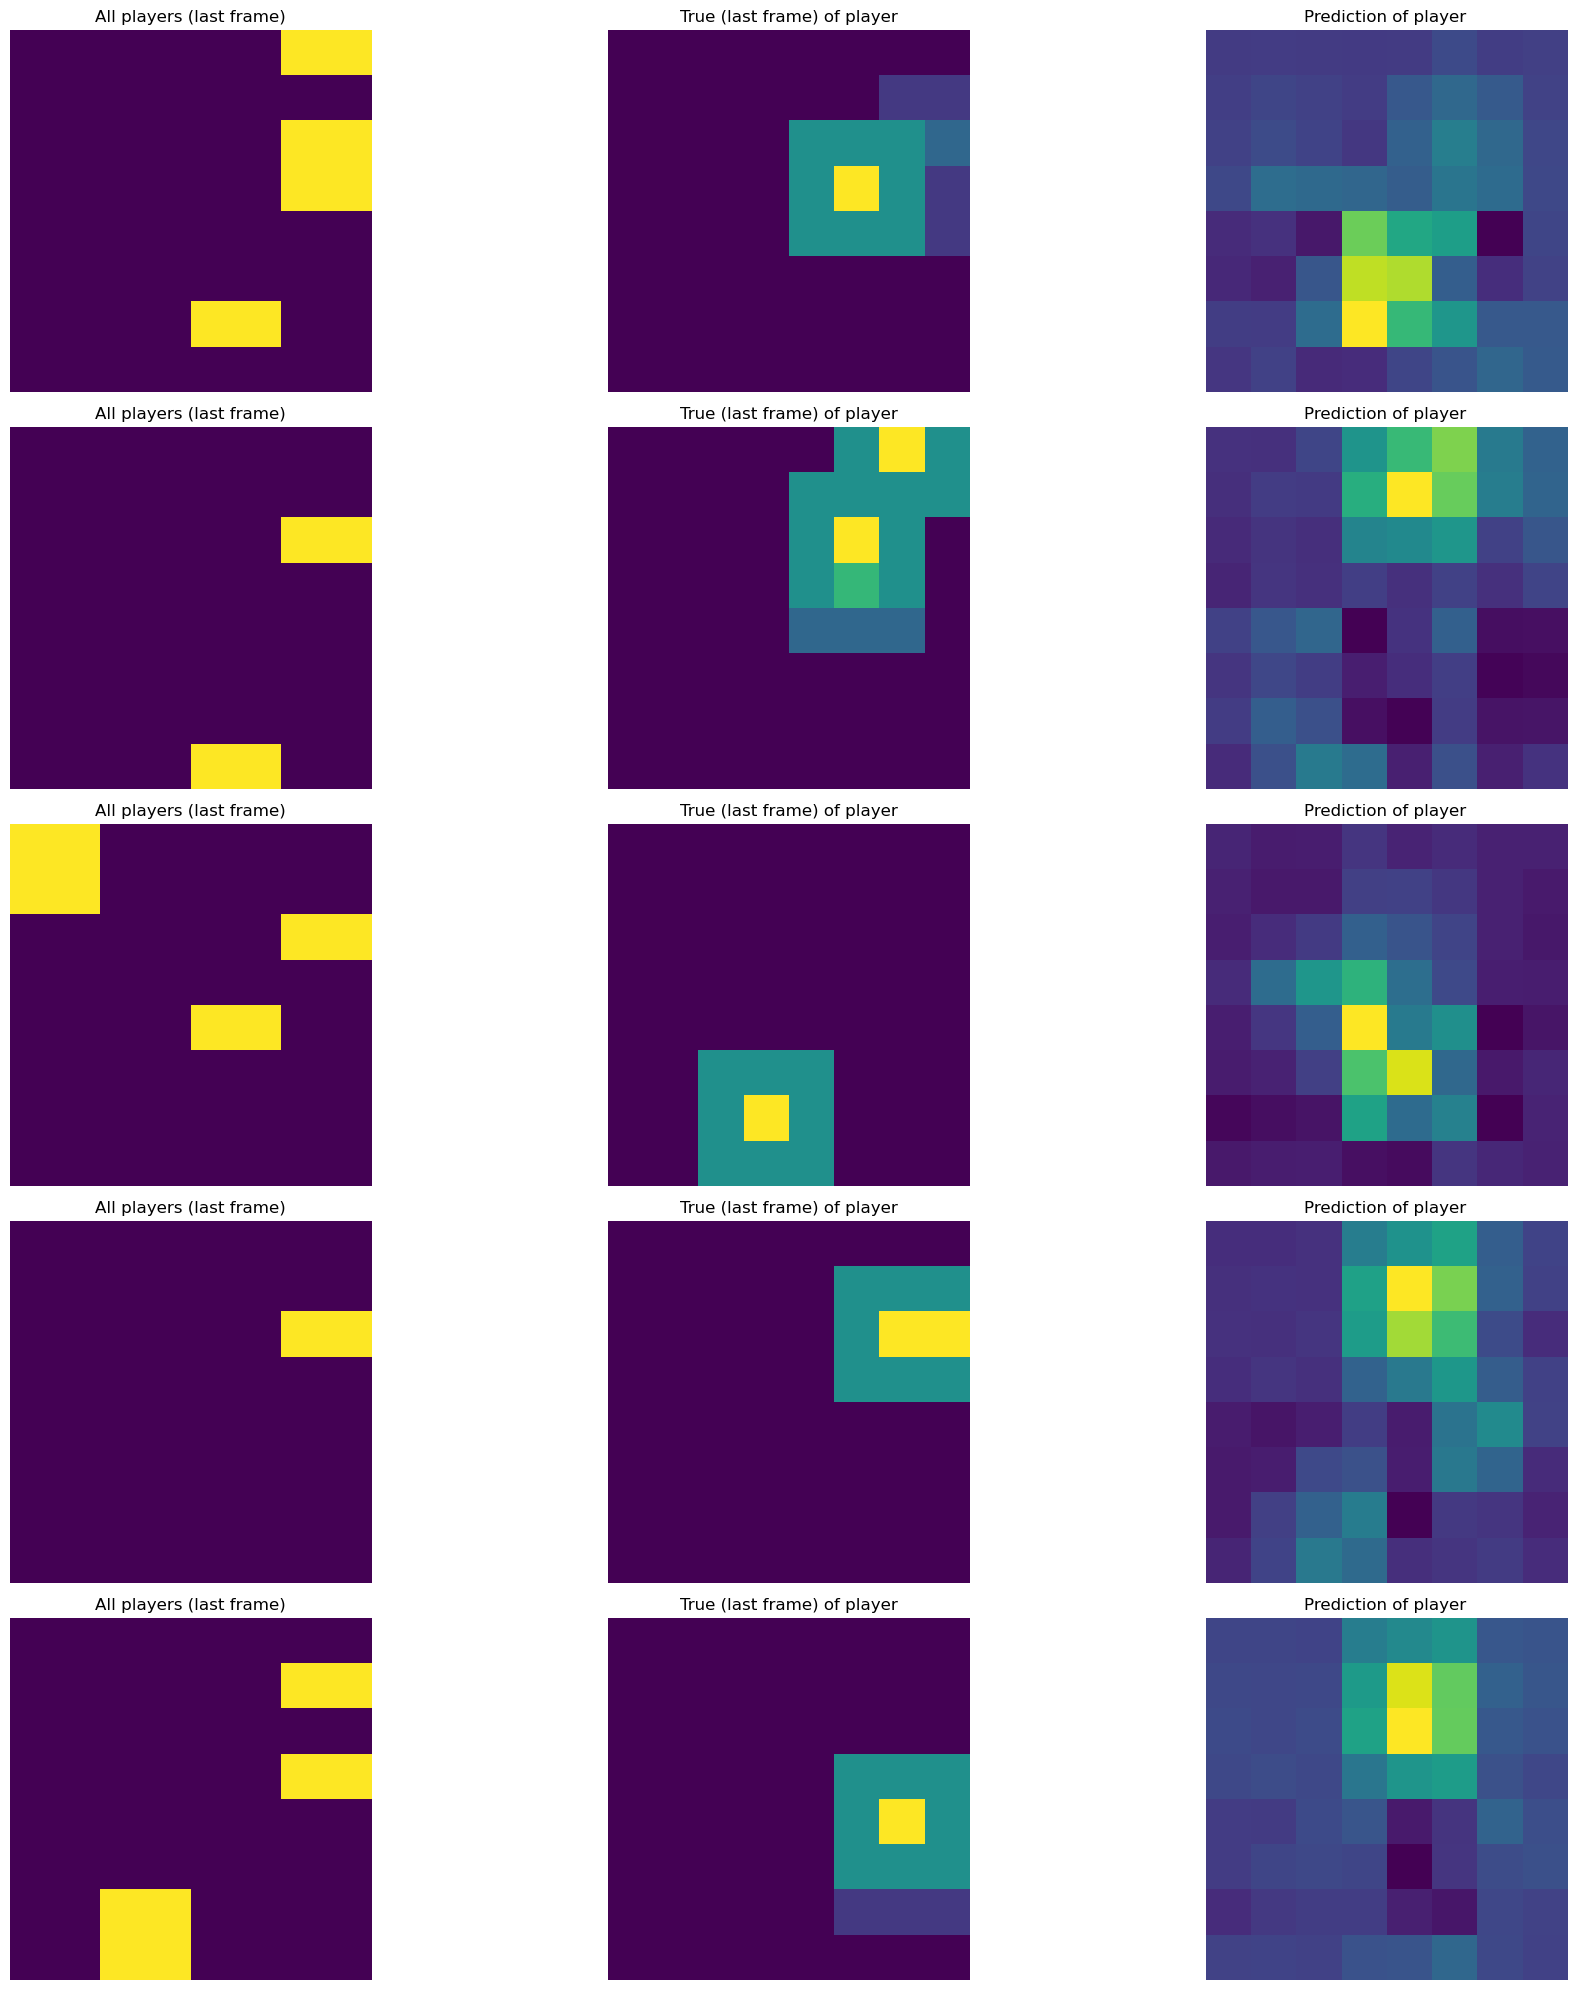

MODELO model1 - ESCENA Scene3
Epoch 1/50
38/38 [==============================] - 6s 111ms/step - loss: 0.0356 - mse: 0.0356 - mae: 0.1031 - val_loss: 0.0417 - val_mse: 0.0417 - val_mae: 0.1197
Epoch 2/50
38/38 [==============================] - 4s 92ms/step - loss: 0.0317 - mse: 0.0317 - mae: 0.1061 - val_loss: 0.0446 - val_mse: 0.0446 - val_mae: 0.1258
Epoch 3/50
38/38 [==============================] - 3s 92ms/step - loss: 0.0309 - mse: 0.0309 - mae: 0.1033 - val_loss: 0.0435 - val_mse: 0.0435 - val_mae: 0.1250
Epoch 4/50
38/38 [==============================] - 4s 94ms/step - loss: 0.0296 - mse: 0.0296 - mae: 0.1008 - val_loss: 0.0443 - val_mse: 0.0443 - val_mae: 0.1259
Epoch 5/50
38/38 [==============================] - 4s 93ms/step - loss: 0.0283 - mse: 0.0283 - mae: 0.0976 - val_loss: 0.0459 - val_mse: 0.0459 - val_mae: 0.1272
Epoch 6/50
38/38 [==============================] - 4s 93ms/step - loss: 0.0268 - mse: 0.0268 - mae: 0.0934 - val_loss: 0.0527 - val_mse: 0.0527 - val_mae

8/8 [==============================] - 1s 20ms/step


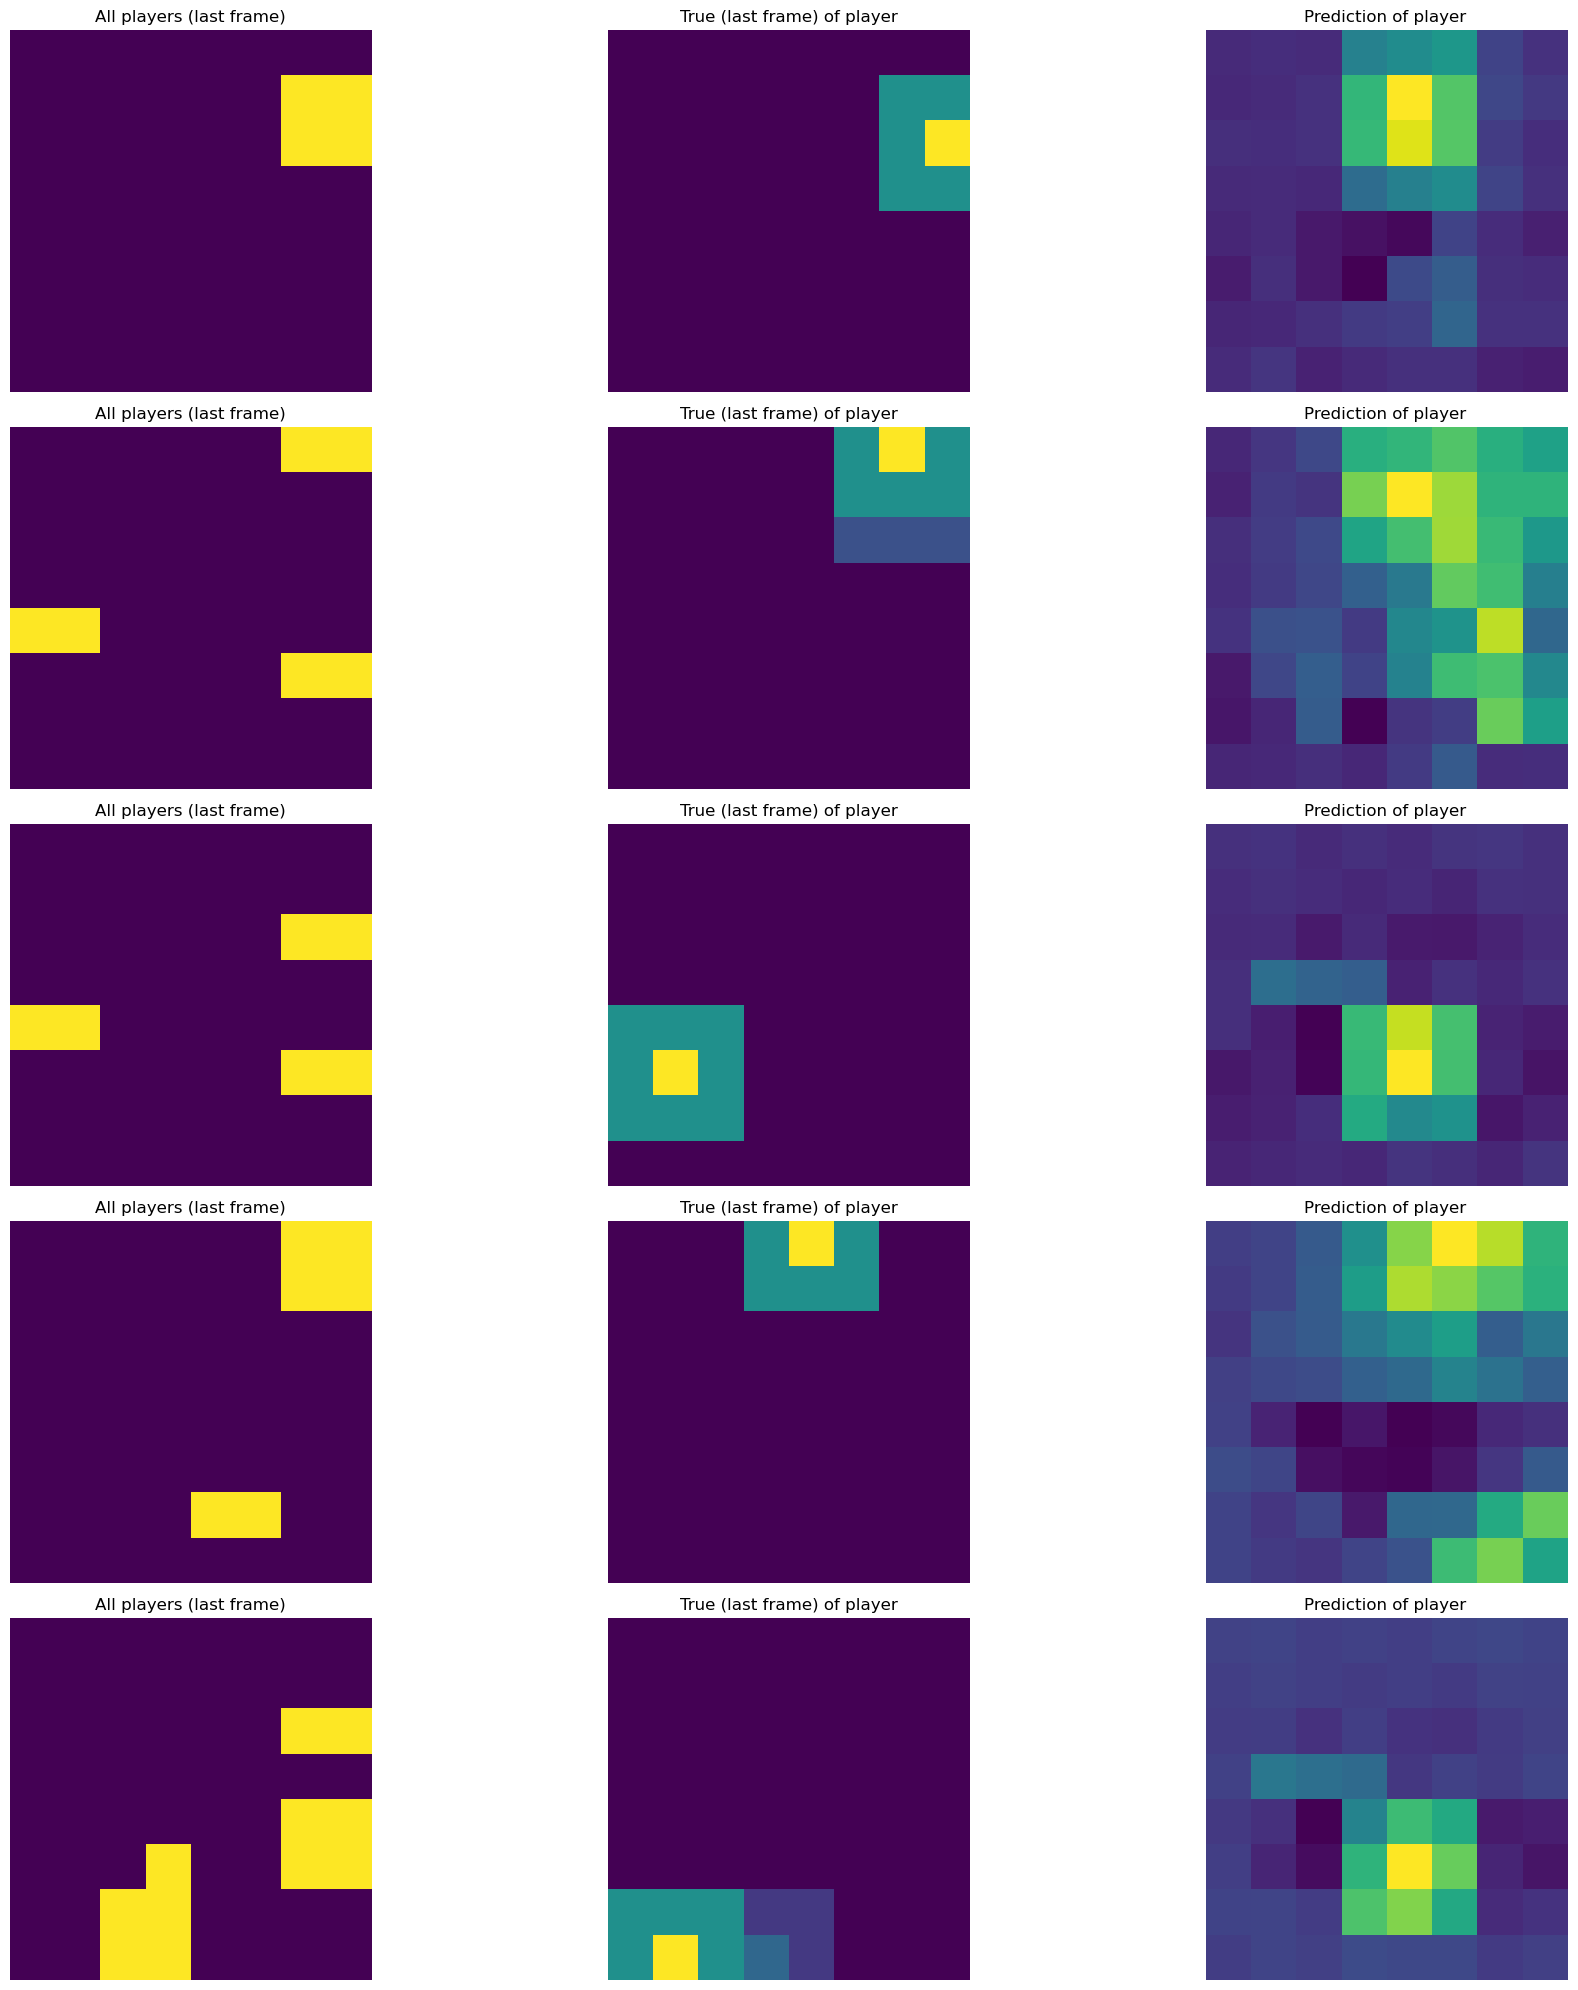

MODELO model2 - ESCENA Scene3
Epoch 1/50
38/38 [==============================] - 10s 212ms/step - loss: 0.0351 - mse: 0.0351 - mae: 0.1034 - val_loss: 0.0419 - val_mse: 0.0419 - val_mae: 0.1235
Epoch 2/50
38/38 [==============================] - 7s 185ms/step - loss: 0.0318 - mse: 0.0318 - mae: 0.1059 - val_loss: 0.0488 - val_mse: 0.0488 - val_mae: 0.1363
Epoch 3/50
38/38 [==============================] - 7s 185ms/step - loss: 0.0311 - mse: 0.0311 - mae: 0.1032 - val_loss: 0.0444 - val_mse: 0.0444 - val_mae: 0.1253
Epoch 4/50
38/38 [==============================] - 7s 186ms/step - loss: 0.0296 - mse: 0.0296 - mae: 0.1012 - val_loss: 0.0482 - val_mse: 0.0482 - val_mae: 0.1274
Epoch 5/50
38/38 [==============================] - 7s 186ms/step - loss: 0.0288 - mse: 0.0288 - mae: 0.0978 - val_loss: 0.0458 - val_mse: 0.0458 - val_mae: 0.1260
Epoch 6/50
38/38 [==============================] - 7s 185ms/step - loss: 0.0276 - mse: 0.0276 - mae: 0.0967 - val_loss: 0.0496 - val_mse: 0.0496 - v

8/8 [==============================] - 1s 71ms/step


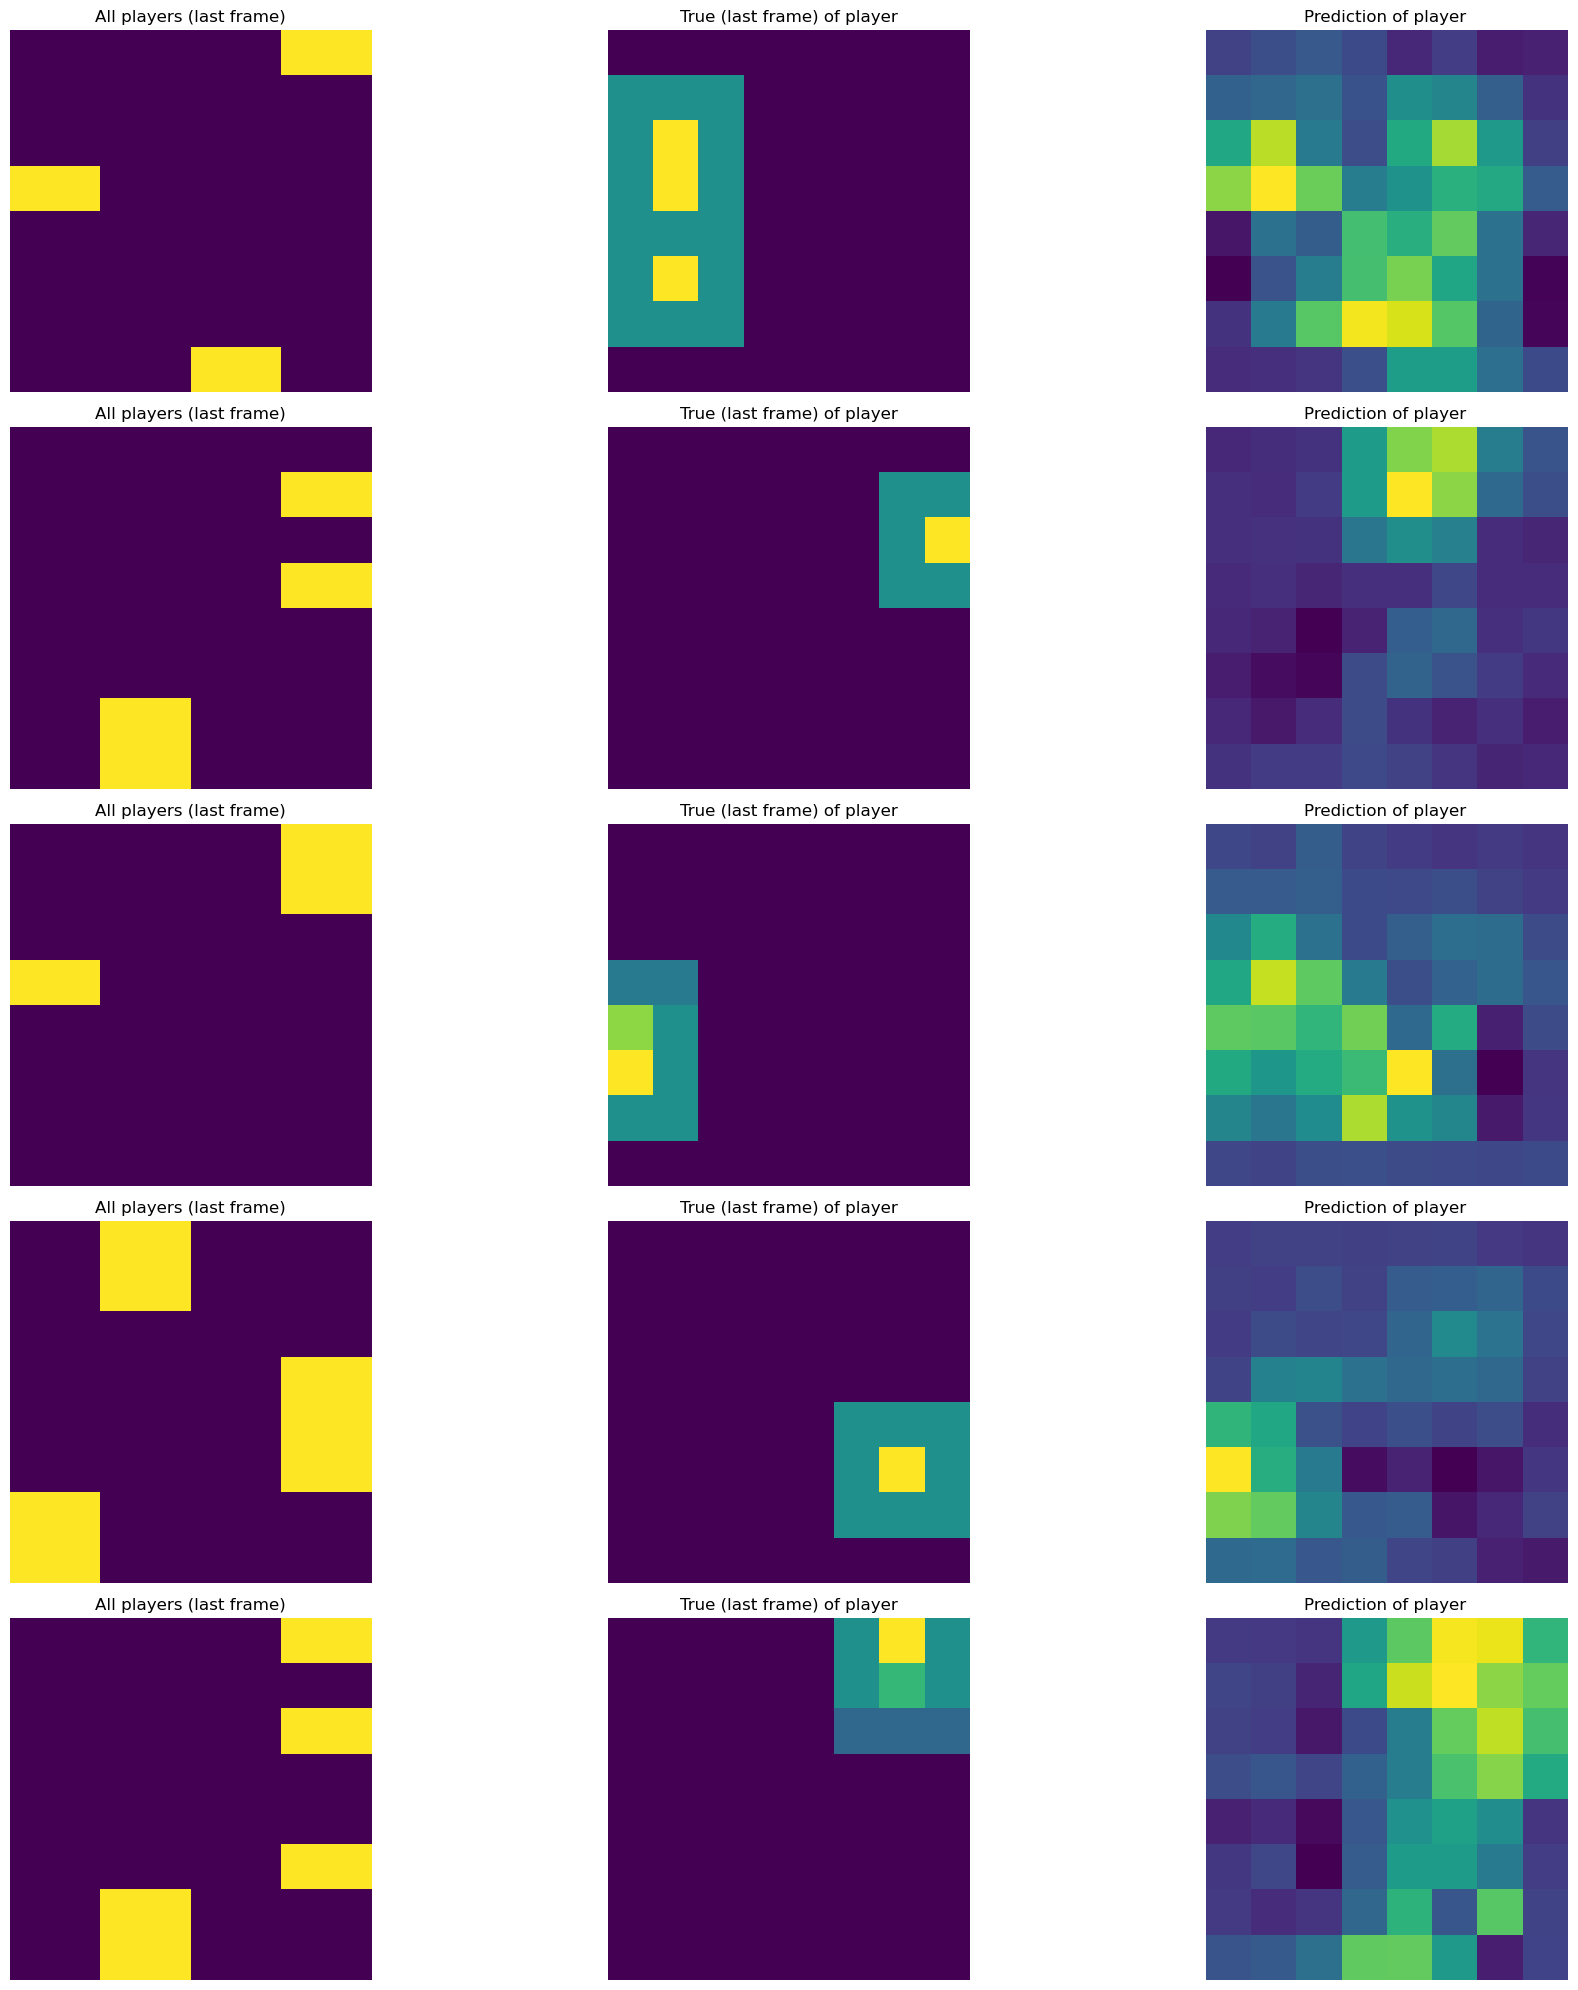

MODELO transf1 - ESCENA Scene3
Epoch 1/50
38/38 [==============================] - 64s 2s/step - loss: 0.0396 - mse: 0.0396 - mae: 0.1262 - val_loss: 0.0441 - val_mse: 0.0441 - val_mae: 0.1261
Epoch 2/50
38/38 [==============================] - 62s 2s/step - loss: 0.0324 - mse: 0.0324 - mae: 0.1093 - val_loss: 0.0433 - val_mse: 0.0433 - val_mae: 0.1256
Epoch 3/50
38/38 [==============================] - 62s 2s/step - loss: 0.0310 - mse: 0.0310 - mae: 0.1060 - val_loss: 0.0445 - val_mse: 0.0445 - val_mae: 0.1268
Epoch 4/50
38/38 [==============================] - 62s 2s/step - loss: 0.0296 - mse: 0.0296 - mae: 0.1032 - val_loss: 0.0525 - val_mse: 0.0525 - val_mae: 0.1391
Epoch 5/50
38/38 [==============================] - 62s 2s/step - loss: 0.0290 - mse: 0.0290 - mae: 0.1016 - val_loss: 0.0465 - val_mse: 0.0465 - val_mae: 0.1270
Epoch 6/50
38/38 [==============================] - 61s 2s/step - loss: 0.0272 - mse: 0.0272 - mae: 0.0973 - val_loss: 0.0492 - val_mse: 0.0492 - val_mae: 0.13

8/8 [==============================] - 7s 859ms/step


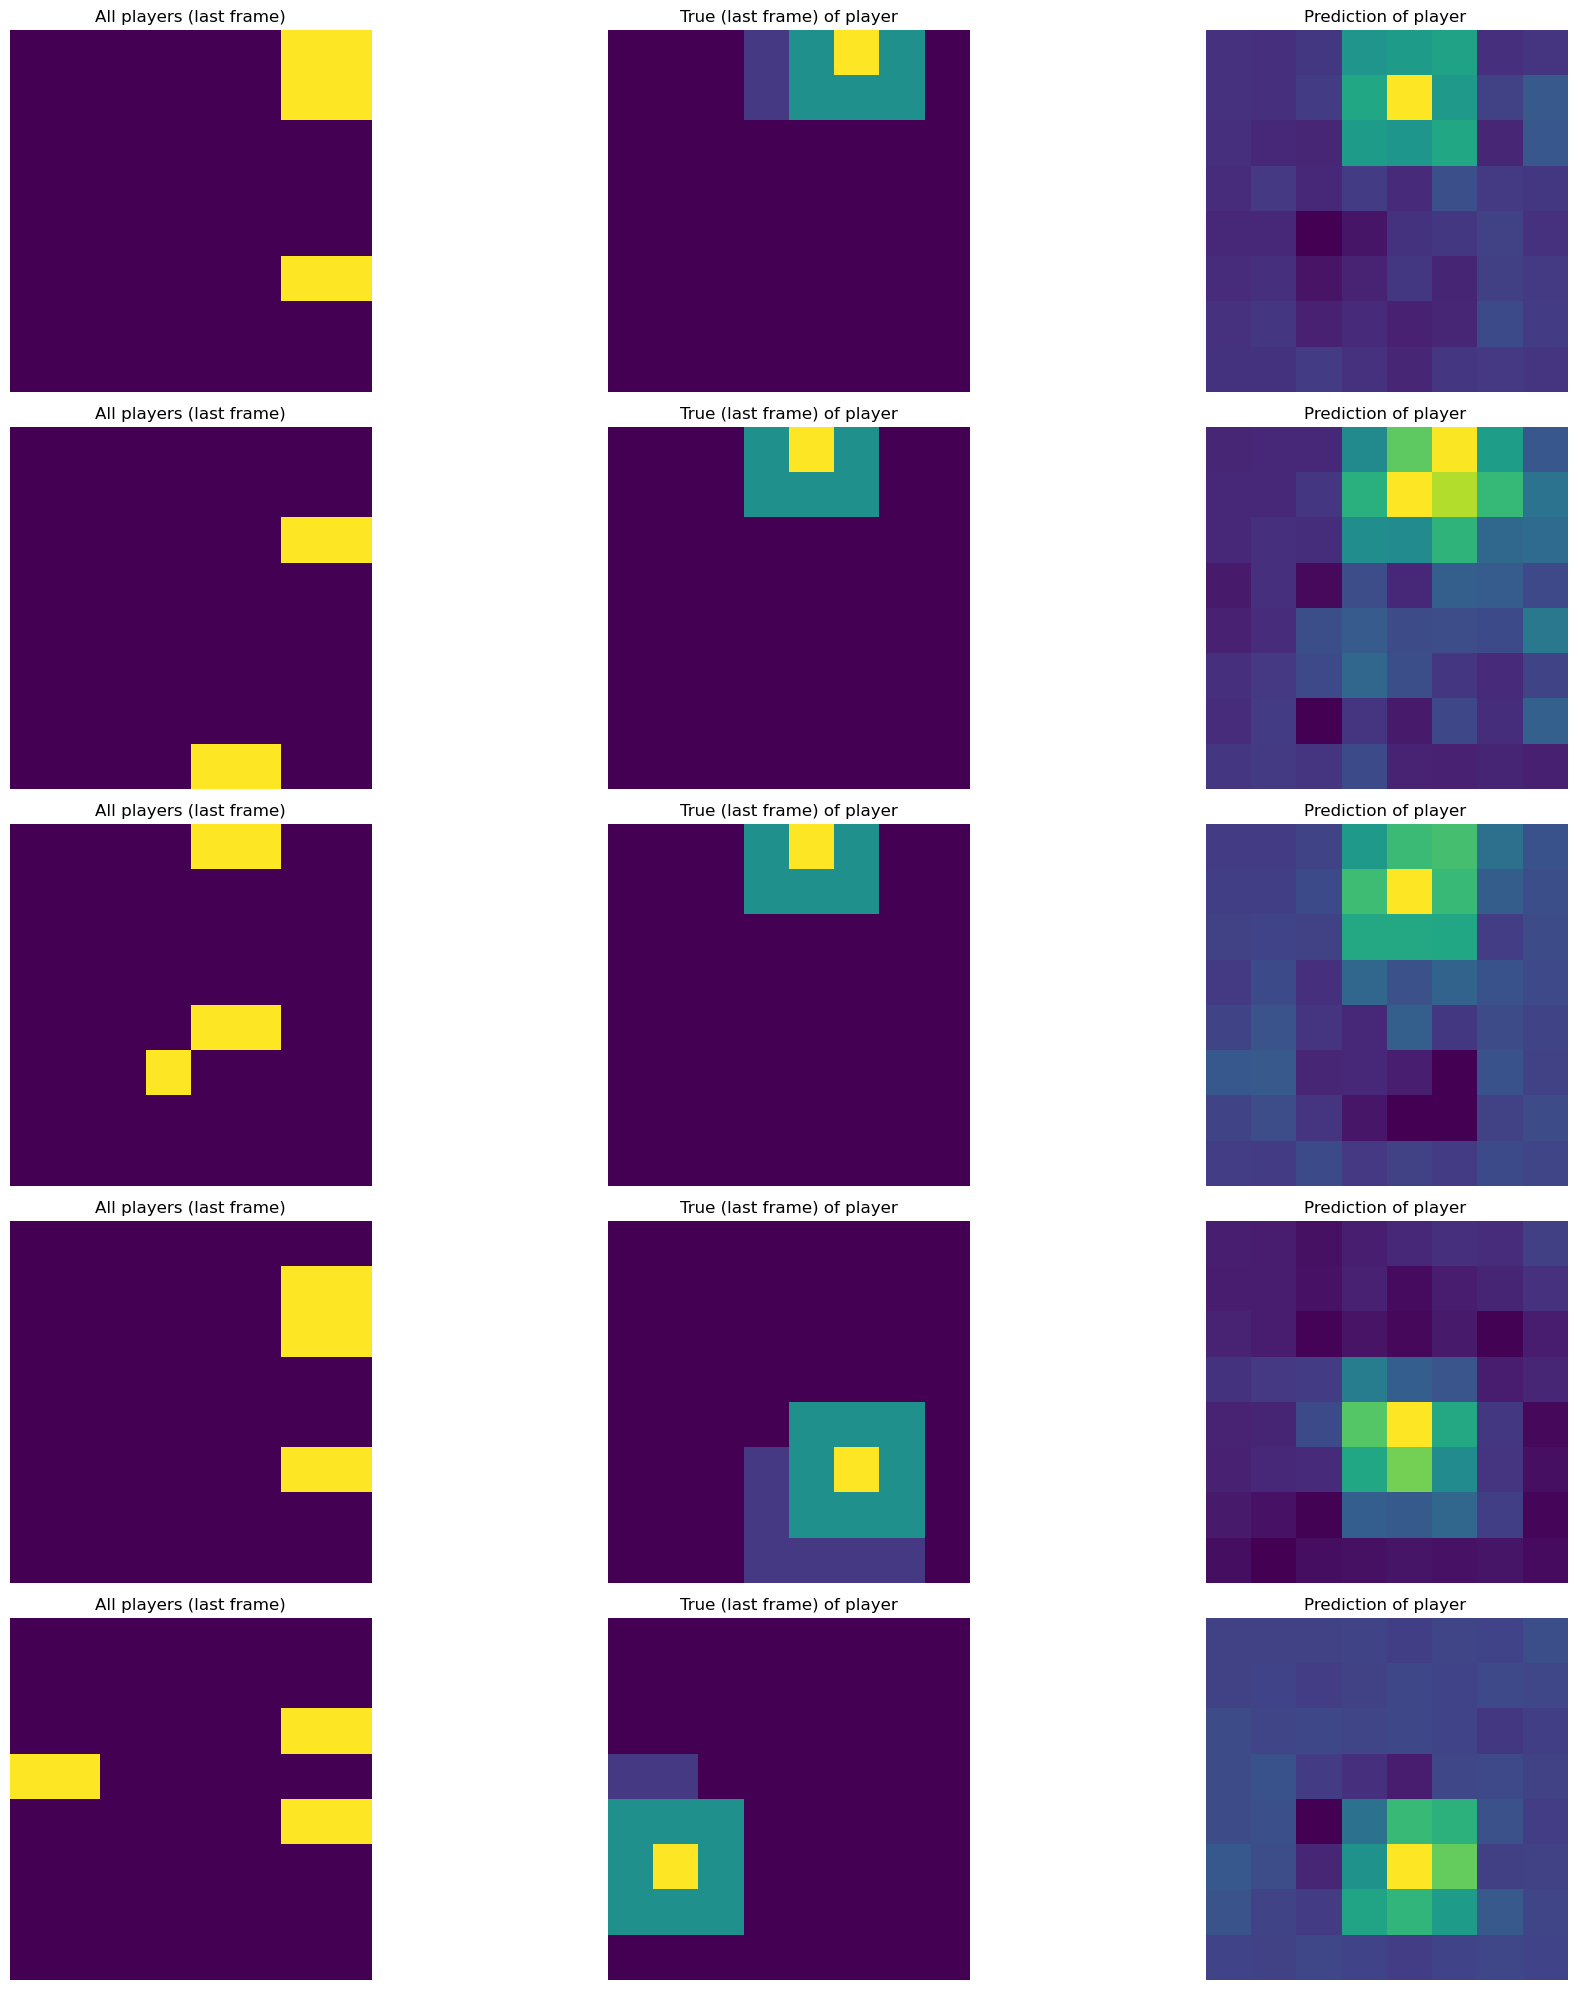

Resultados por escena:
Escena Scene1:
Modelo model0 - MSE: 0.0337, MAE: 0.1058, Tiempo: 61.90s
Modelo model1 - MSE: 0.0358, MAE: 0.1077, Tiempo: 38.11s
Modelo model2 - MSE: 0.0344, MAE: 0.1036, Tiempo: 87.76s
Modelo transf1 - MSE: 0.0368, MAE: 0.1123, Tiempo: 548.51s

Escena Scene2:
Modelo model0 - MSE: 0.0391, MAE: 0.1101, Tiempo: 252.14s
Modelo model1 - MSE: 0.0377, MAE: 0.1073, Tiempo: 143.15s
Modelo model2 - MSE: 0.0348, MAE: 0.1028, Tiempo: 242.47s
Modelo transf1 - MSE: 0.0376, MAE: 0.1063, Tiempo: 2345.92s

Escena Scene3:
Modelo model0 - MSE: 0.0540, MAE: 0.1328, Tiempo: 336.00s
Modelo model1 - MSE: 0.0548, MAE: 0.1300, Tiempo: 175.61s
Modelo model2 - MSE: 0.0481, MAE: 0.1241, Tiempo: 357.20s
Modelo transf1 - MSE: 0.0665, MAE: 0.1402, Tiempo: 3028.16s

RESUMEN RESULTADOS:
Modelo model0:
Tiempo de ejecución total: 650.04 segundos
MSE promedio: 0.0422
MAE promedio: 0.1163

BCE promedio: 0.3692

Modelo model1:
Tiempo de ejecución total: 356.86 segundos
MSE promedio: 0.0428
MAE prome

In [17]:
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss

# Assuming you have a function to calculate binary cross-entropy (log loss)
def binary_cross_entropy(y_true, y_pred):
    """
    Calcula la Binary Cross-Entropy (BCE) asegurando que y_true y y_pred sean válidos.
    Soporta etiquetas no binarias (soft labels).
    """
    # Asegurar que los valores de y_pred estén entre 0 y 1
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    
    # Asegurar que los valores de y_true estén en el rango [0,1]
    y_true = np.clip(y_true, 0, 1)

    # Fórmula BCE: -(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))
    bce = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    return np.mean(bce)

np.random.seed(42)

# Lista de identificadores de modelo
model_ids = ["model0","model1","model2","transf1"] 


# Estructuras para almacenar resultados y tiempos de ejecución
mse_results = {model_id: [] for model_id in model_ids}
bce_results = {model_id: [] for model_id in model_ids} #binary cross entropy
mae_results = {model_id: [] for model_id in model_ids}
training_times = {model_id: [] for model_id in model_ids}
total_execution_time = {model_id: 0 for model_id in model_ids}

print(np.unique(S))

escenas_seleccionadas=np.unique(S)
#escenas_seleccionadas=escenas_seleccionadas[3:]
print("Para esta ejecución se han seleccionada las escenas: ")
print(escenas_seleccionadas)

for ixs, sc in enumerate(escenas_seleccionadas):
    # Índices para entrenamiento y prueba
    train_indices = np.where(S != sc)[0]
    test_indices = np.where(S == sc)[0]
    np.random.shuffle(train_indices)

    XYT_train = XYT[train_indices]
    rssiT_train = rssiT[train_indices]
    YT_train = YT[train_indices]

    XYT_test = XYT[test_indices]
    rssiT_test = rssiT[test_indices]
    YT_test = YT[test_indices]
    
    for model_id in model_ids:
        print(f"MODELO {model_id} - ESCENA {sc}")
        
        model = load_model(f"{model_id}.h5")

        start_time = time.time()

        history = model.fit([XYT_train, rssiT_train], YT_train,
                                  batch_size=16,
                                  validation_data=([XYT_test, rssiT_test], YT_test),
                                  epochs=50)
        end_time = time.time()
        training_time = end_time - start_time
        
        YT_prediction = model.predict([XYT_test, rssiT_test])

        plottingRandom(XYT_test, YT_test, YT_prediction)

        mse = mean_squared_error(YT_test.flatten(), YT_prediction.flatten())
        mae = mean_absolute_error(YT_test.flatten(), YT_prediction.flatten())
        bce = binary_cross_entropy(YT_test.flatten(), YT_prediction.flatten())

        mse_results[model_id].append(mse)
        mae_results[model_id].append(mae)
        bce_results[model_id].append(bce)
        
       
        training_times[model_id].append(training_time)
        total_execution_time[model_id] += training_time

# Calculando promedios y mostrando resultados

print("Resultados por escena:")
for i, sc in enumerate(escenas_seleccionadas):
    print(f"Escena {sc}:")
    for model_id in model_ids:
        print(f"Modelo {model_id} - MSE: {mse_results[model_id][i]:.4f}, MAE: {mae_results[model_id][i]:.4f}, Tiempo: {training_times[model_id][i]:.2f}s")
    print("")
    
print("RESUMEN RESULTADOS:")
for model_id in model_ids:
    average_mse = np.mean(mse_results[model_id])
    average_mae = np.mean(mae_results[model_id])
    average_bce = np.mean(bce_results[model_id])
    print(f"Modelo {model_id}:")
    print(f"Tiempo de ejecución total: {total_execution_time[model_id]:.2f} segundos")
    print(f"MSE promedio: {average_mse:.4f}")
    print(f"MAE promedio: {average_mae:.4f}\n")
    print(f"BCE promedio: {average_bce:.4f}\n")


In [18]:
ts.sort()
print(ts)

[1710622214, 1710622215, 1710622216, 1710622217, 1710622218, 1710622219, 1710622220, 1710622221, 1710622222, 1710622223, 1710622224, 1710622225, 1710622226, 1710622227, 1710622228, 1710622229, 1710622230, 1710622231, 1710622232, 1710622233, 1710622234, 1710622235, 1710622236, 1710622237, 1710622238, 1710622239, 1710622240, 1710622241, 1710622242, 1710622243, 1710622244, 1710622245, 1710622246, 1710622247, 1710622248, 1710622249, 1710622250, 1710622251, 1710622252, 1710622253, 1710622254, 1710622255, 1710622256, 1710622257, 1710622258, 1710622259, 1710622260, 1710622261, 1710622262, 1710622263, 1710622264, 1710622265, 1710622266, 1710622267, 1710622268, 1710622269, 1710622270, 1710622271, 1710622272, 1710622273, 1710622274, 1710622275, 1710622276, 1710622277, 1710622278, 1710622279, 1710622280, 1710622281, 1710622282, 1710622283, 1710622284, 1710622285, 1710622286, 1710622287, 1710622288, 1710622289, 1710622290, 1710622291, 1710622292, 1710622293, 1710622294, 1710622295, 1710622296, 171